# K562 mapped to T2T version 2.0
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [9]:
import sys
from pathlib import Path
from datetime import datetime

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)

In [10]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract Extranded window around the 30 bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using P2 on 2004-12-16

## Setting mC threshold in methylation calling confidance to 0.7

# Expend window size

In [11]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# region_start = 206586162
# region_end = 206586192

# # Expend window size
# expand_window_size = 50 # 500 #500 #1500 # 0 
# expand_window_size
# print("Expend window size by 2 * ", expand_window_size)
# region_start = 206586162 - expand_window_size
# region_end = 206586192 + expand_window_size + 1


# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206583000   # 206586162
region_end = 206590000 # 20658619


region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}')

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGA

No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3998 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3998   0% | 00:00<…

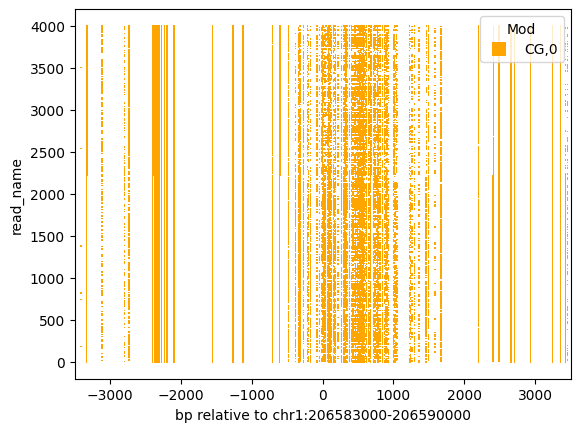

In [12]:
extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

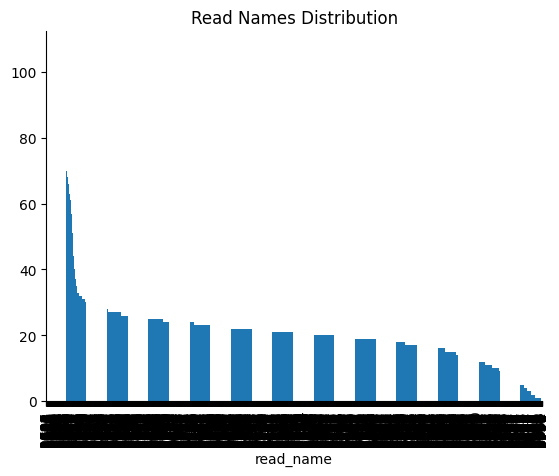

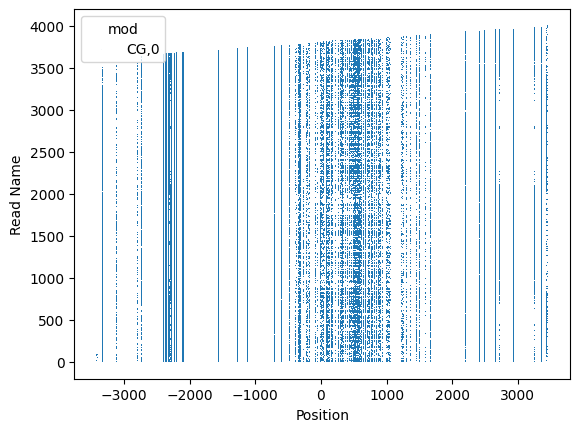

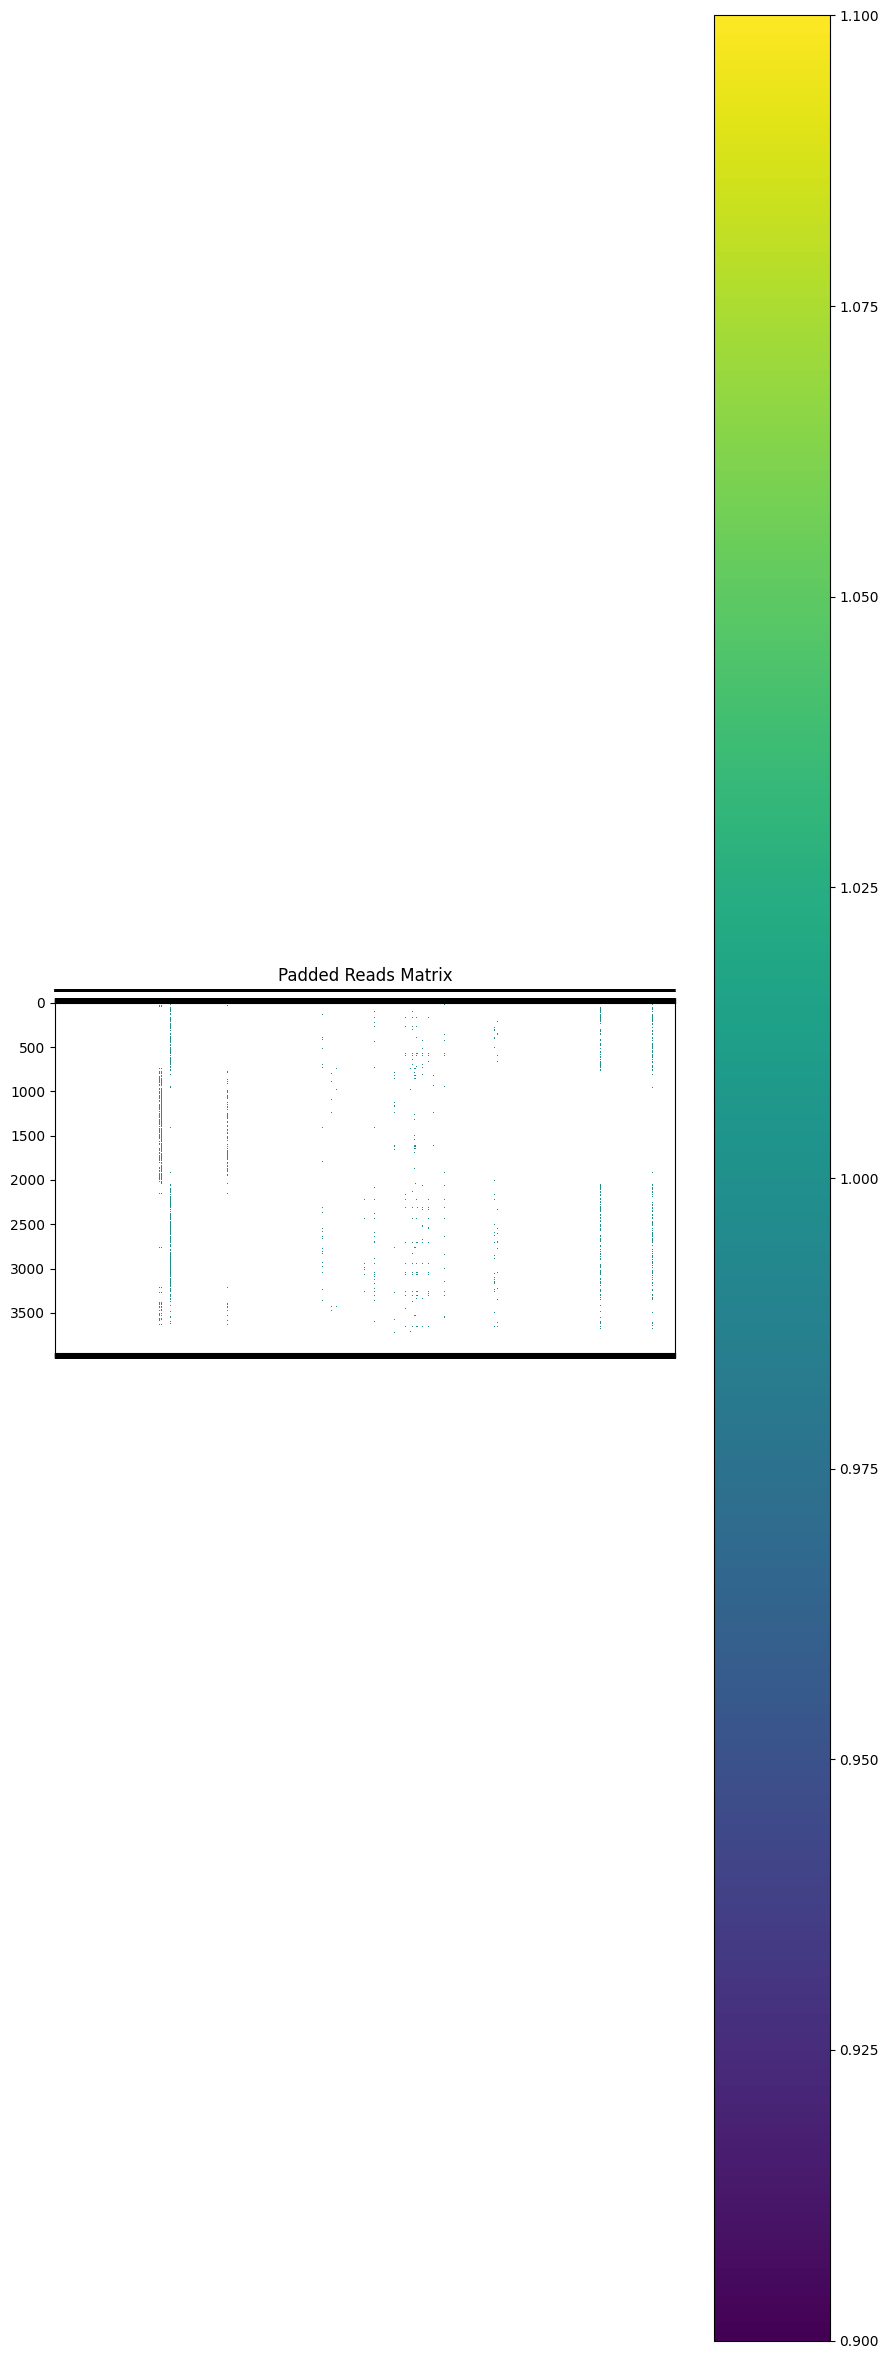

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy


In [13]:
keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

In [14]:
# keep_unmethylated_reads = False

# if extract_file:
#     if keep_unmethylated_reads:
#         reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)

#         padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     else:
#         reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)
#         padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# # if extract_file:
# #     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
# #     visualize_data(reads_df)

# #     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
# #     if padded_reads is not None:
# #         plot_padded_reads(padded_reads, ref_seq_list)
# #         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


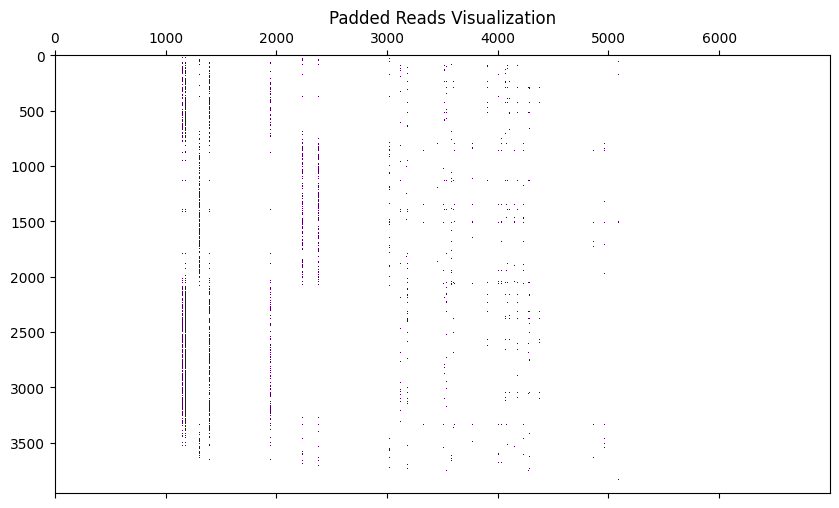

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

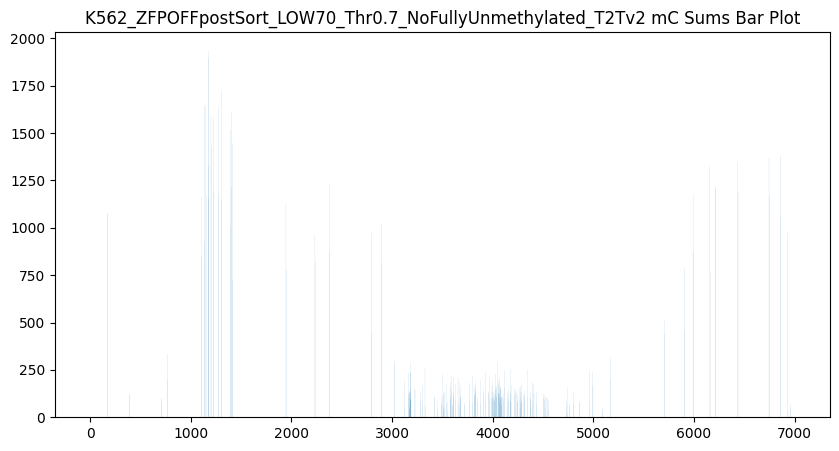

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


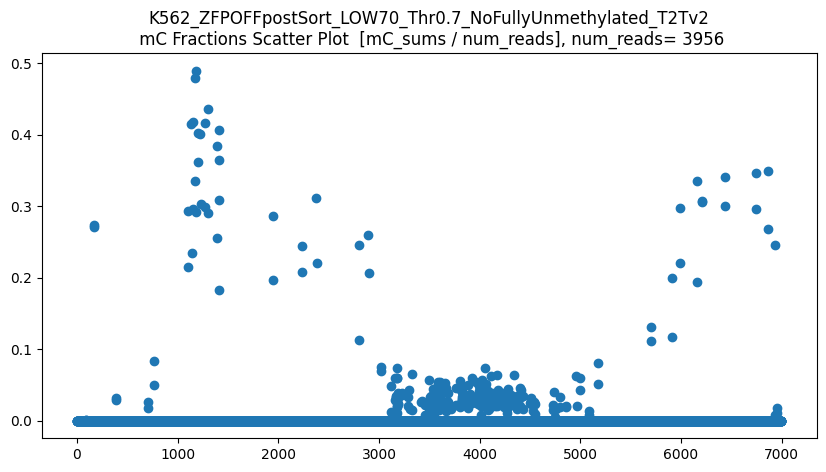

CGs_all_sums  = [   6. 2150.  239.  175.  532. 2010. 2570. 2822. 3221. 3091. 3020. 2779.
 2826. 2874. 2527. 2826. 2167. 1909. 1785. 2104. 1422. 1842.  573.  241.
  348.  176.  177.  171.  211.  320.  392.  336.  245.  219.  298.  212.
  232.  319.  214.  119.  169.  294.  184.  151.  187.  247.  119.  275.
  263.  347.  126.  330.  235.  265.  287.  237.  207.  256.  140.  269.
  298.  267.  238.  289.  333.  194.  266.  268.  334.  261.  318.  230.
  299.  269.  240.  120.  182.  210.  344.  305.  255.  274.  414.  317.
  306.  280.  235.  273.  240.  257.  306.  171.  164.  214.  210.  402.
  213.  253.  333.  215.  292.  269.  272.  224.  202.  194.  199.  263.
  263.  219.  220.  257.  359.  200.  198.  266.  301.  200.  224.  203.
  159.  206.  129.  146.  180.  137.  204.  157.  333.  405.   84.  519.
  956. 1251. 2051. 2089. 2423. 2534. 2538. 2442. 1005.  113.]
CGs_all_sums / len(CGs_all) = [0.00151668 0.54347826 0.06041456 0.0442366  0.13447927 0.50808898
 0.64964611 0.71334681

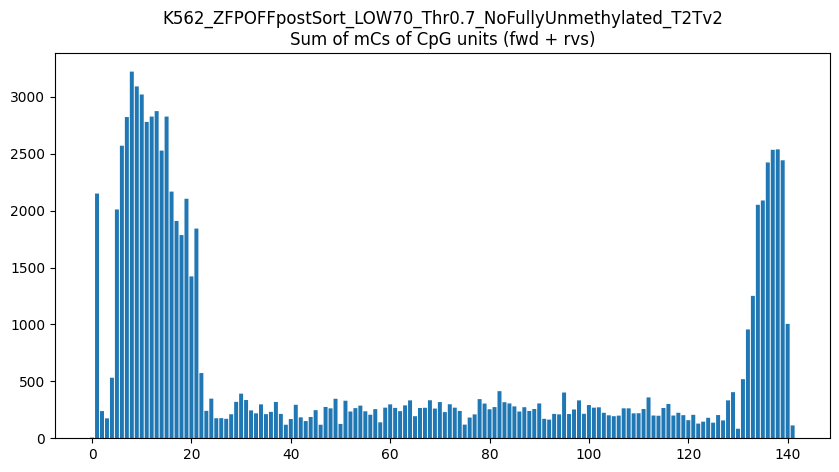

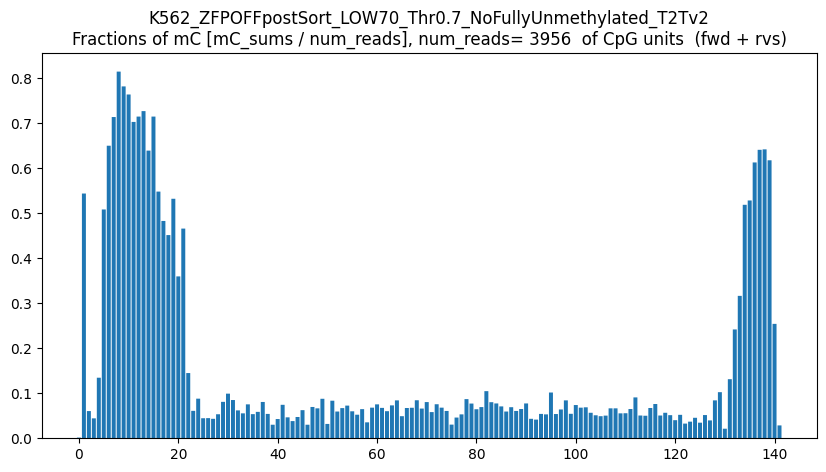

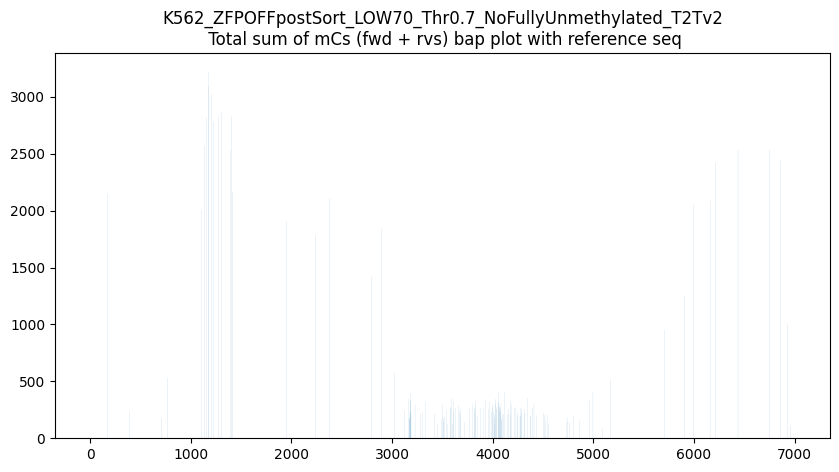

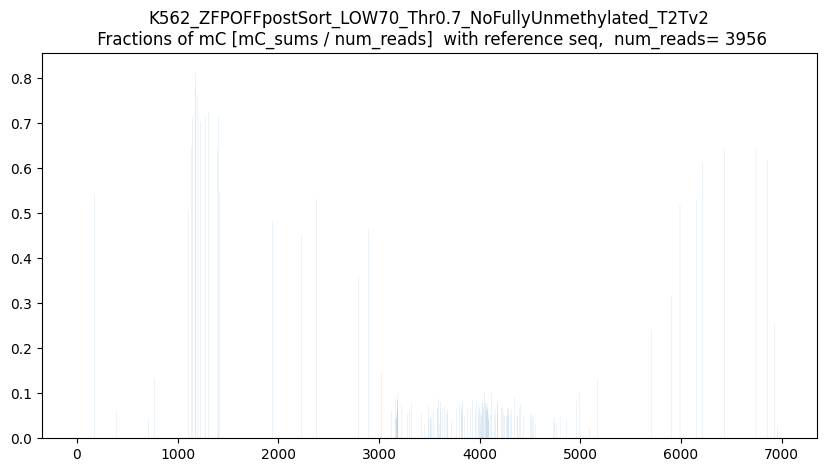

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



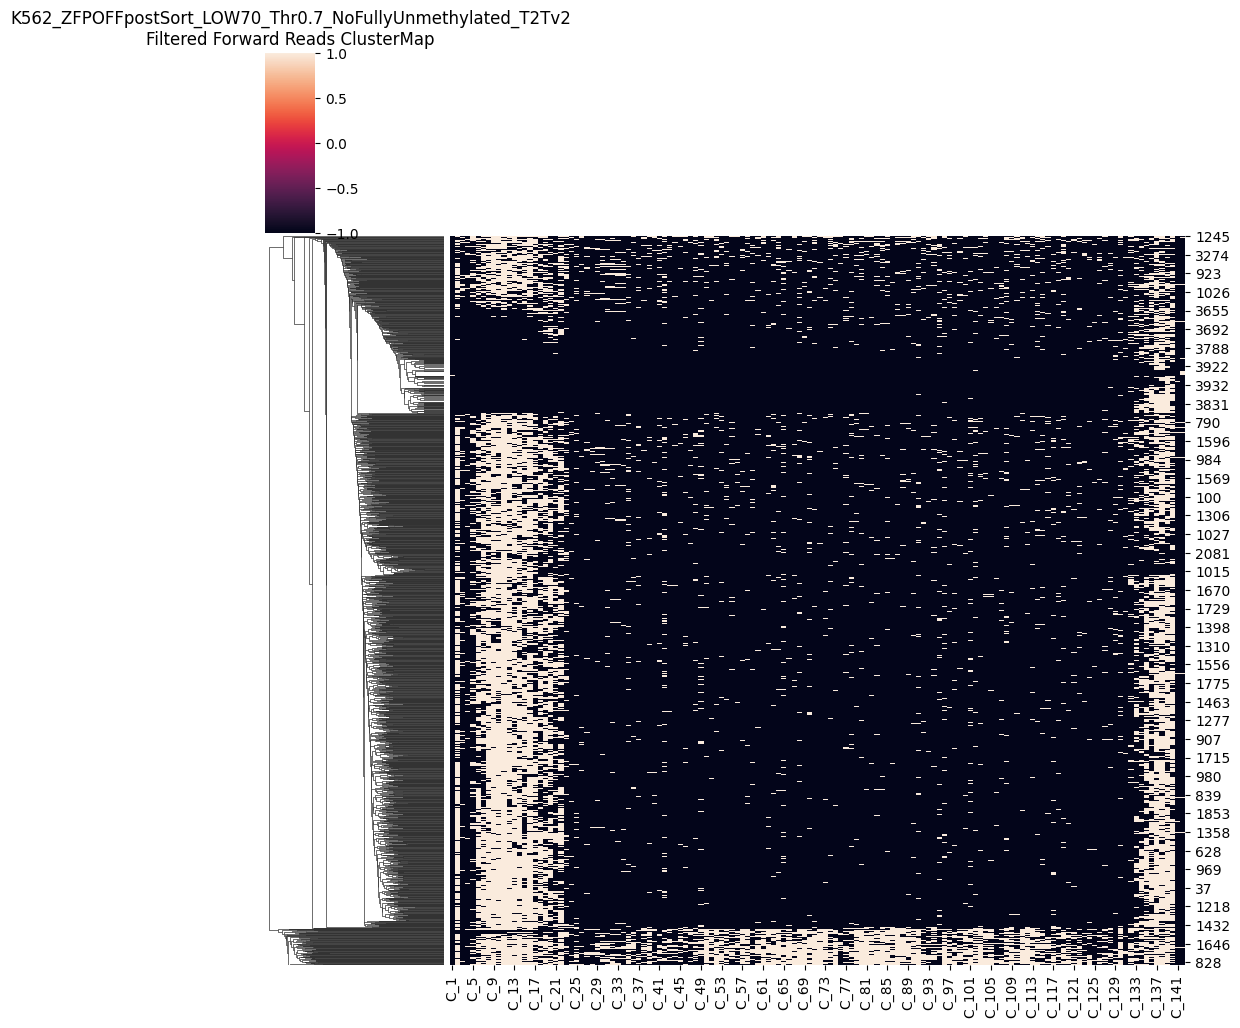

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



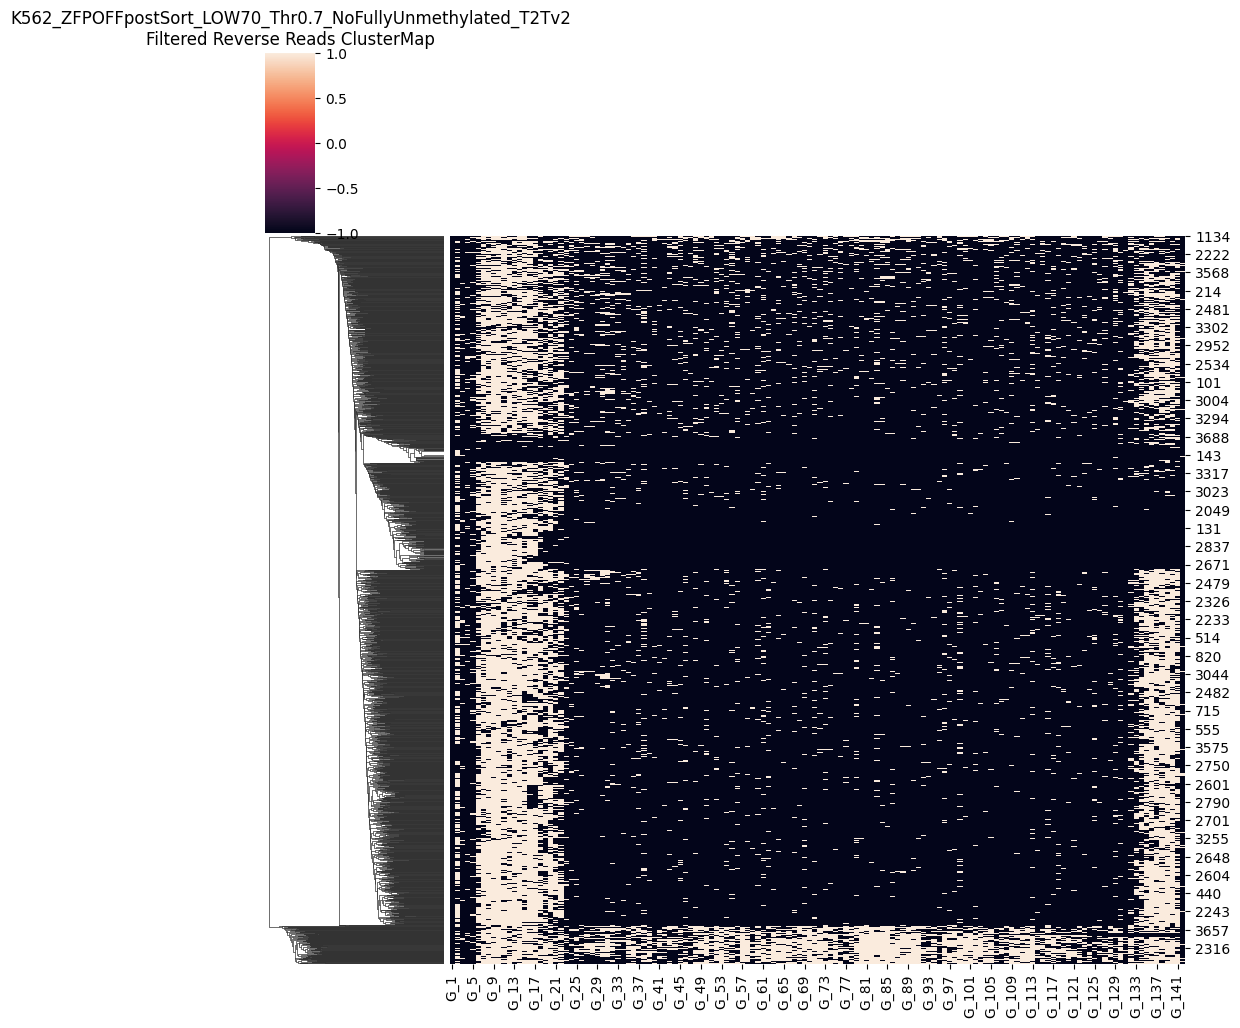

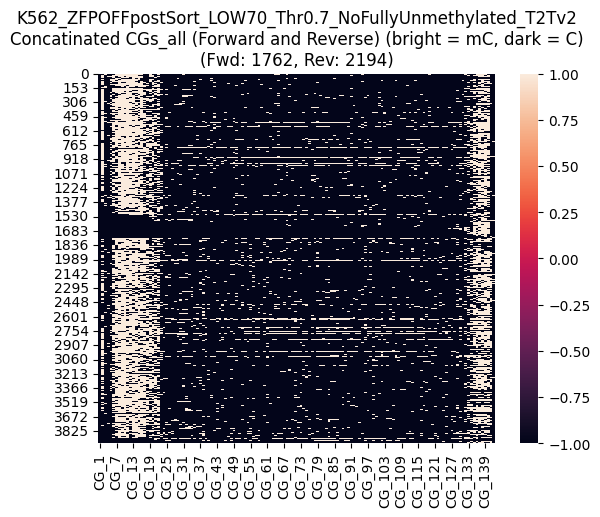

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



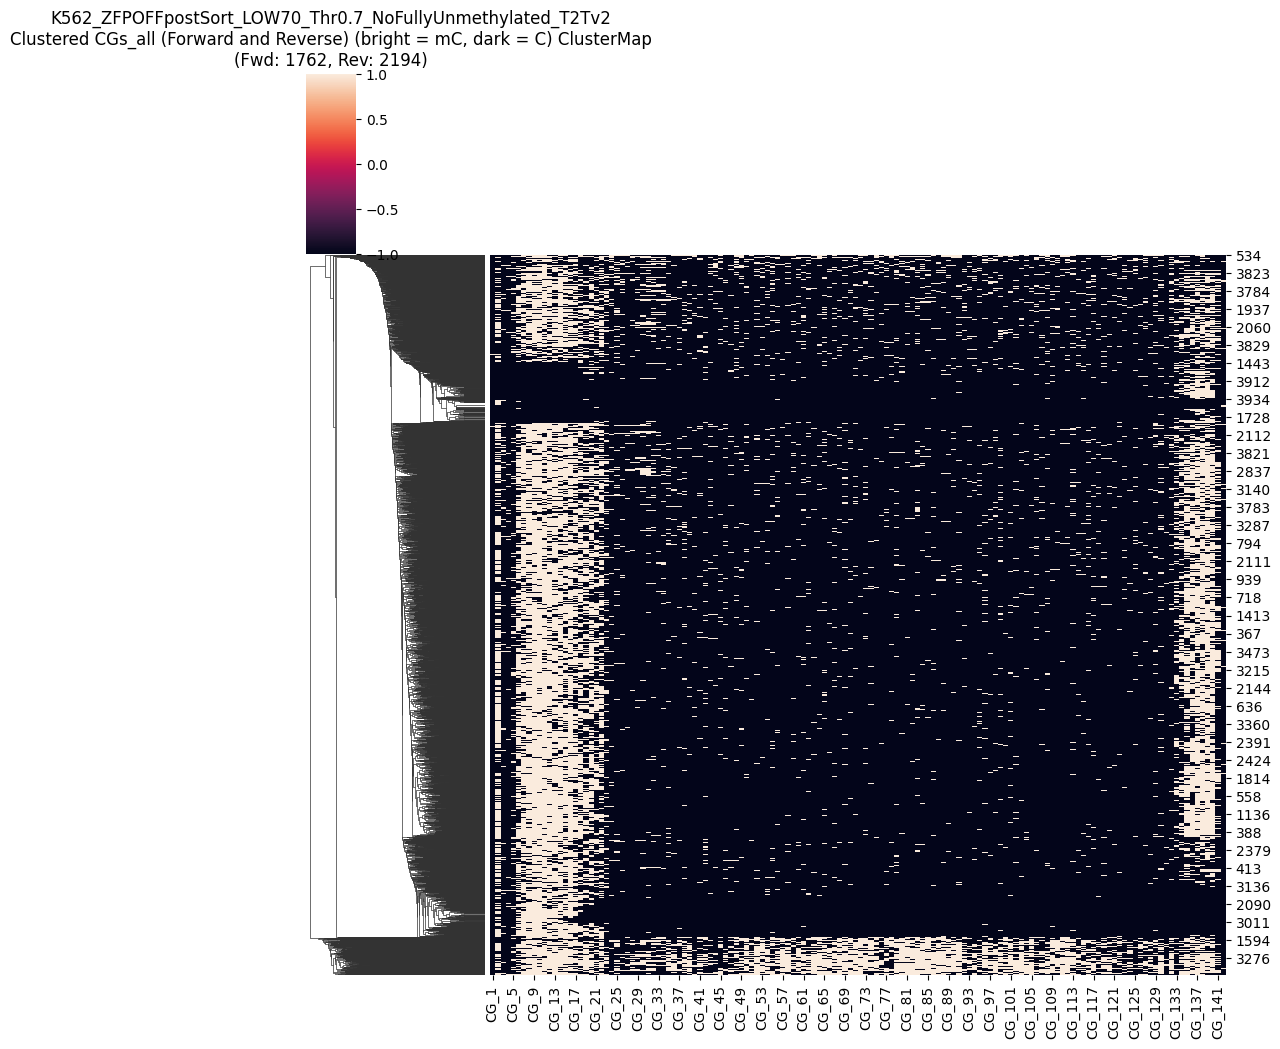

CGs_all saved as CG_142_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1762_numRVS2194_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy in dimelo_v2_output
CGs_all saved as CG_info_df_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1762_numRVS2194_2025-03-25.csv in dimelo_v2_output
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): too many values to unpack (expected 4)


In [15]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [16]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited cells:
From around 3000 reads located near the ROI, 

only ~1700 reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads:   

Reverse reads: 

# Analyze the Edited cells from the same cells other sorted part 

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2942 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2942   0% | 00:00<…

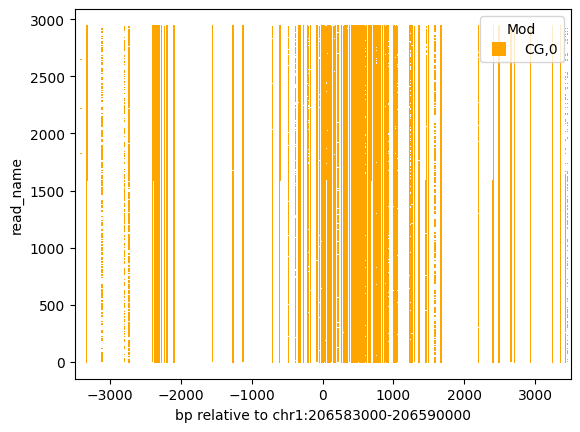

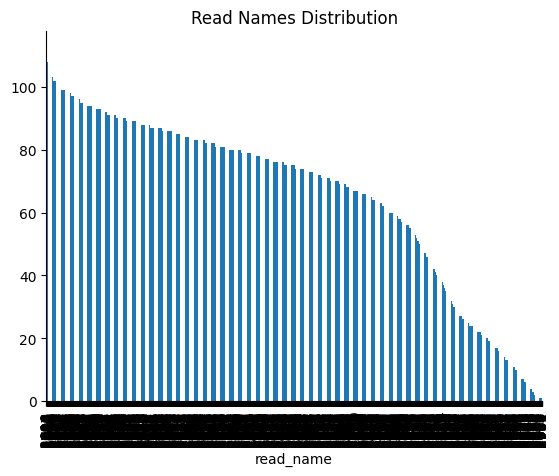

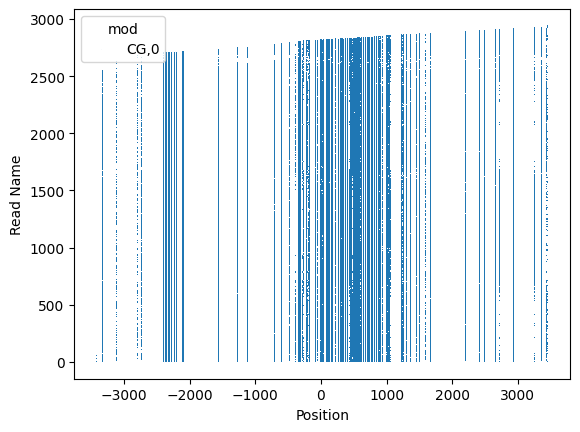

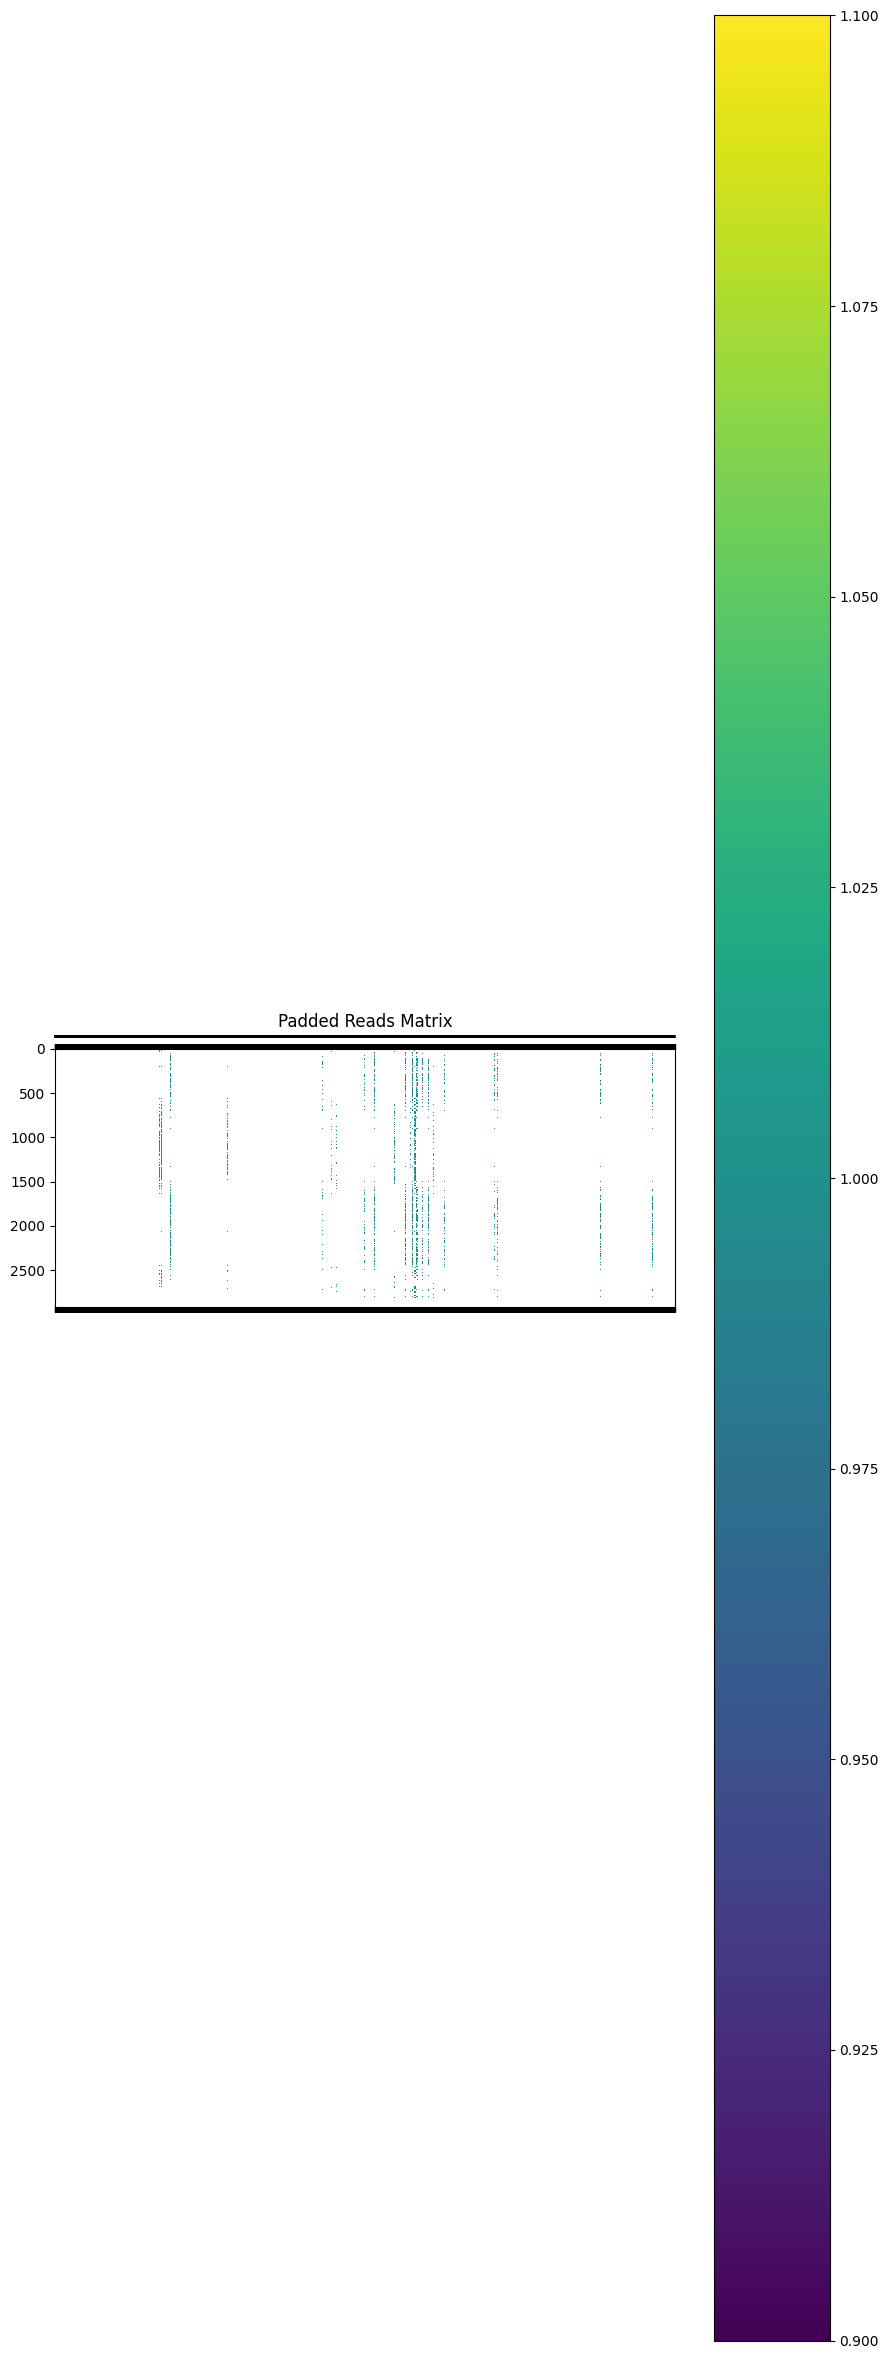

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy


In [17]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2" 

# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

#  "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [18]:
save_padded_reads_name_np

'padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy'

Padded reads loaded successfully.


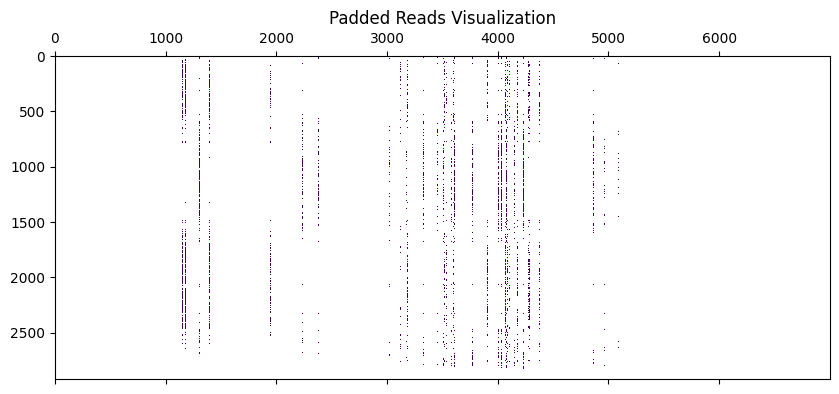

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

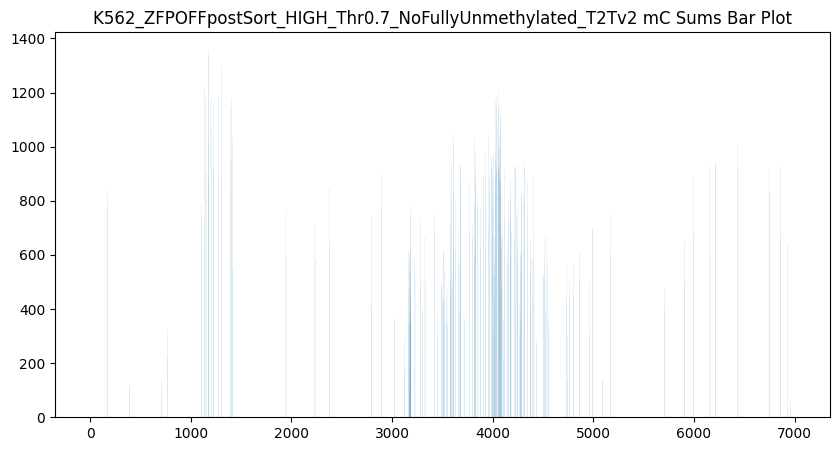

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


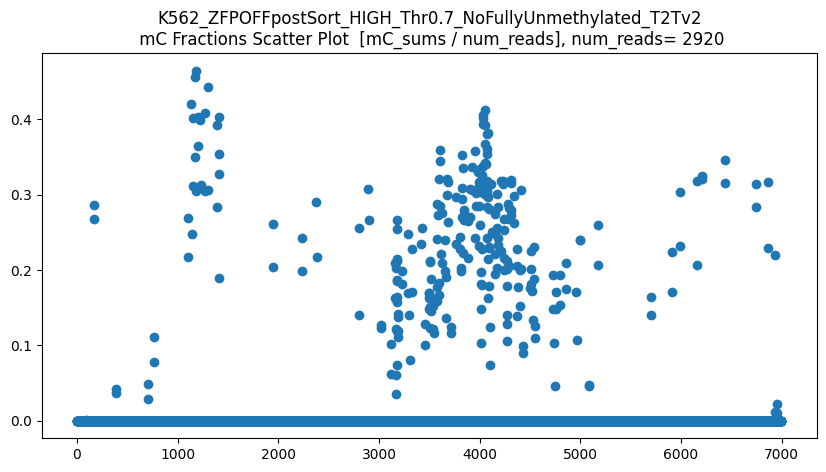

CGs_all_sums  = [   3. 1618.  230.  225.  549. 1418. 1950. 2081. 2354. 2244. 2240. 2075.
 2084. 2186. 1973. 2129. 1586. 1357. 1290. 1480. 1156. 1672.  731.  477.
 1085.  461.  767.  761.  969. 1205. 1321. 1104.  817.  673. 1111. 1219.
  644. 1163. 1431.  669.  989.  907. 1053.  977.  974.  800.  812. 1357.
 1167. 1733. 1020. 1880. 1650. 1414. 1279.  953. 1809. 1695.  704. 1551.
 1377. 1173. 1818. 1763. 1628. 1593. 1405. 1686. 1875. 1750. 1716. 1932.
 1833. 1508. 1735.  833. 1007. 1188. 1833. 2161. 2074. 2096. 1997. 2146.
 2121. 1868. 1823. 1920. 1817. 1882. 1981. 1099. 1188. 1493.  579. 1645.
 1211. 1526. 1335. 1586. 1509. 1585. 1844. 1323. 1412.  719.  893. 1204.
 1620. 1424. 1614. 1853. 1636. 1002. 1182. 1028. 1479.  553. 1044. 1245.
  892. 1222.  687.  997.  436.  933. 1016. 1123.  811. 1398.  271. 1361.
  890. 1151. 1561. 1535. 1883. 1933. 1746. 1596.  675.   93.]
CGs_all_sums / len(CGs_all) = [0.0010274  0.55410959 0.07876712 0.07705479 0.1880137  0.48561644
 0.66780822 0.71267123

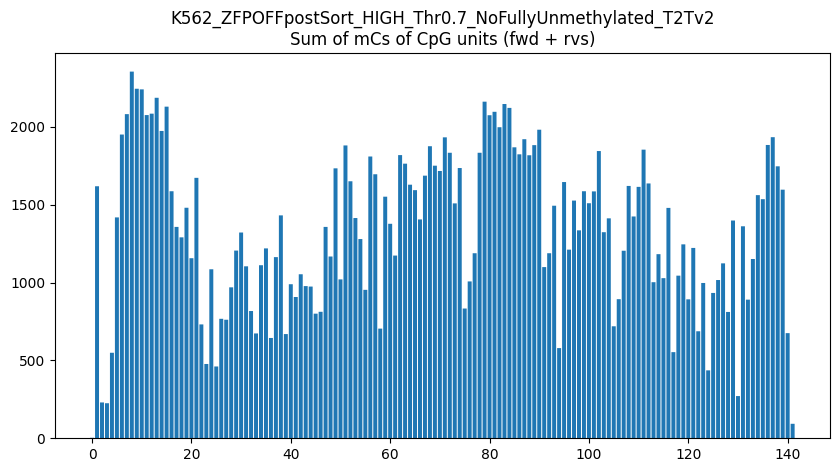

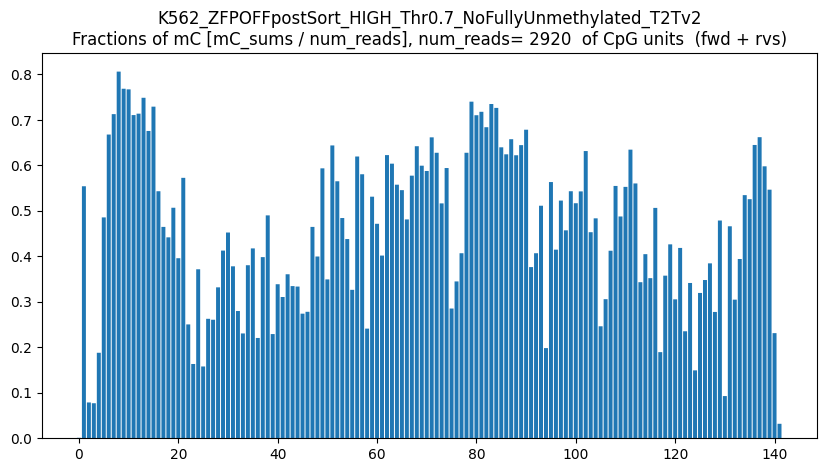

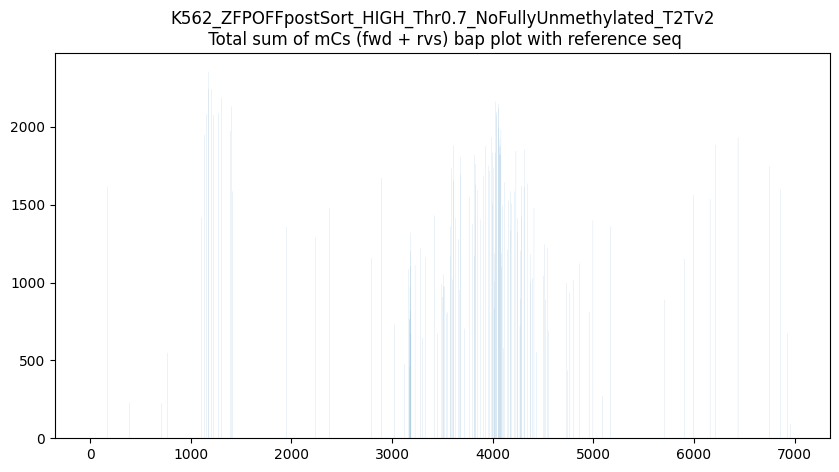

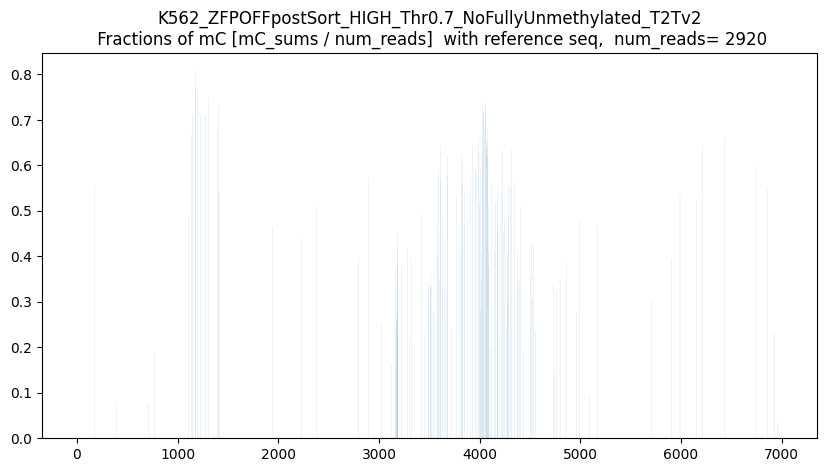

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



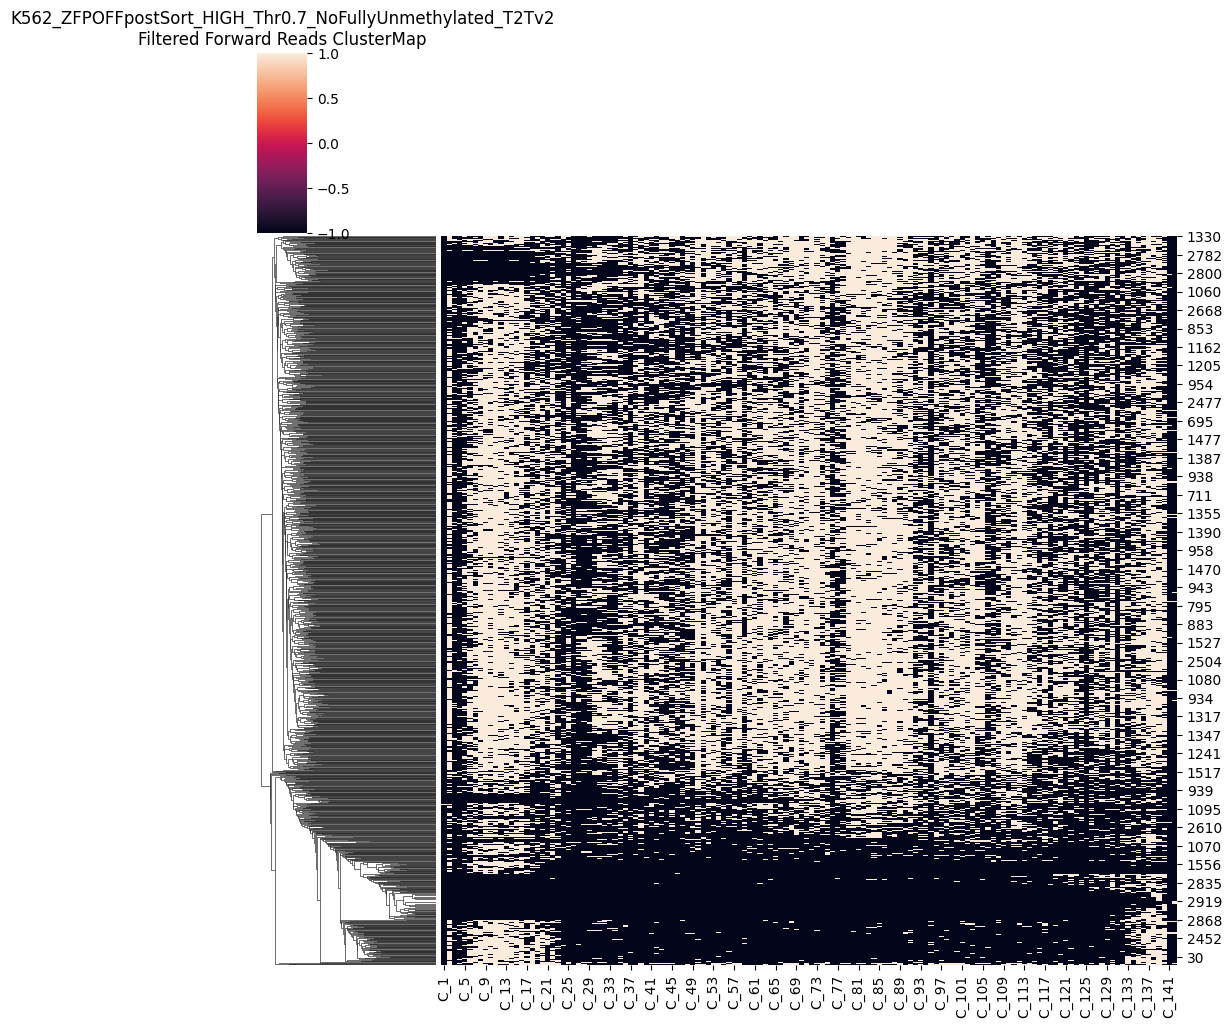

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



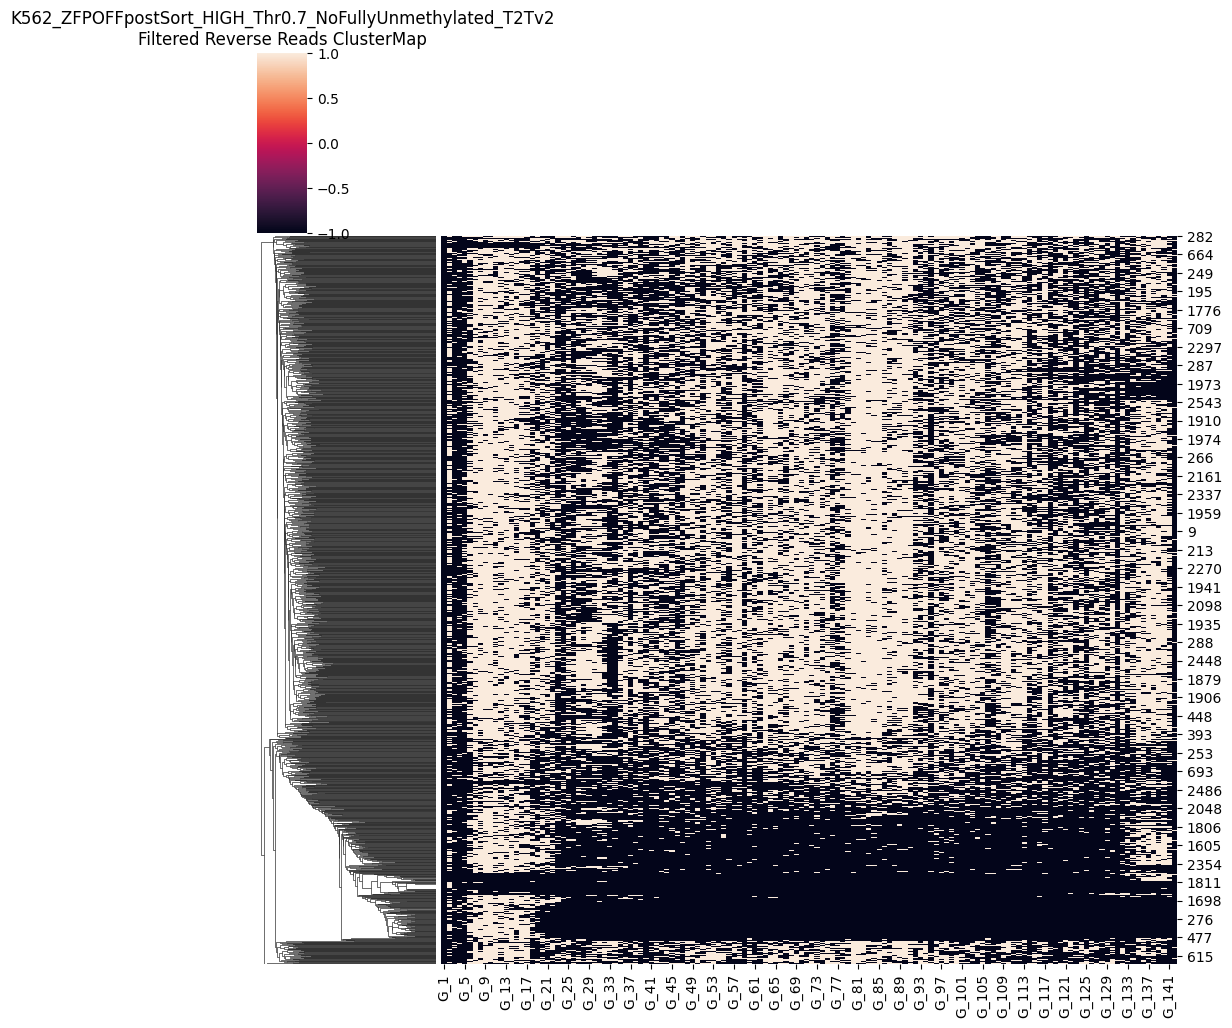

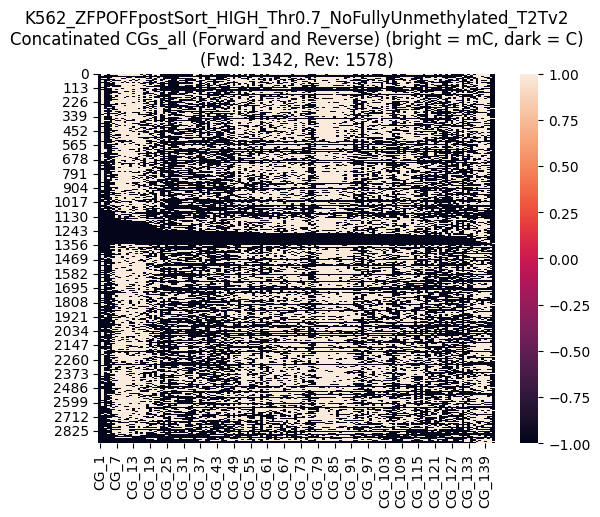

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



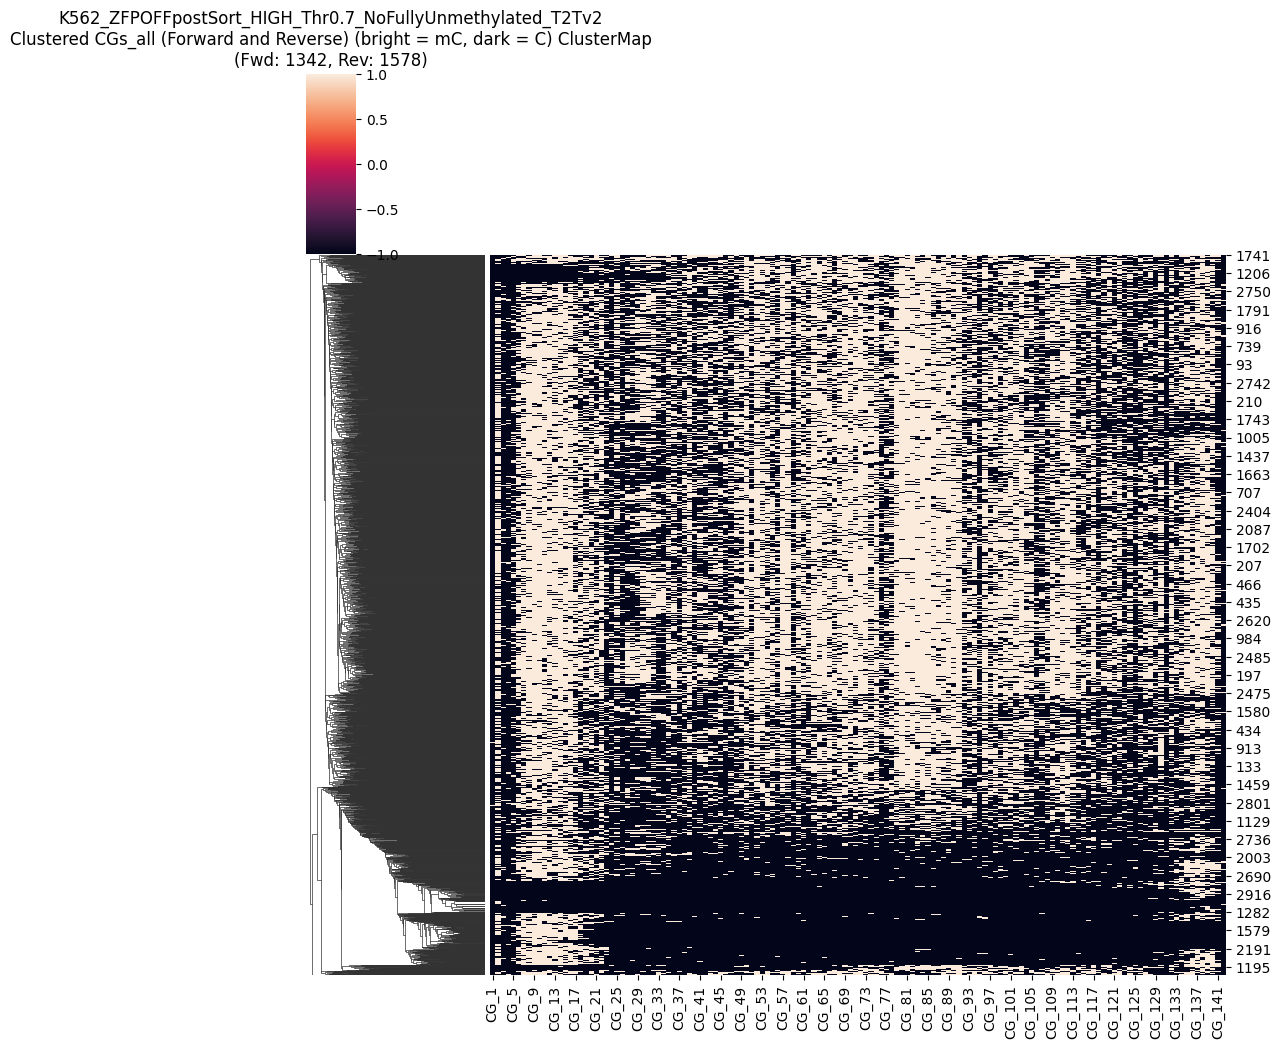

CGs_all saved as CG_142_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1342_numRVS1578_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy in dimelo_v2_output
CGs_all saved as CG_info_df_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1342_numRVS1578_2025-03-25.csv in dimelo_v2_output
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): too many values to unpack (expected 4)


In [19]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [20]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced sorted cells :
From around   reads located near the ROI, 

 ~  reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads:  

Reverse reads:  


# Change the mC threshold to 0.9 - only keep very confident mC values


System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGA

          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3998 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3998   0% | 00:00<…

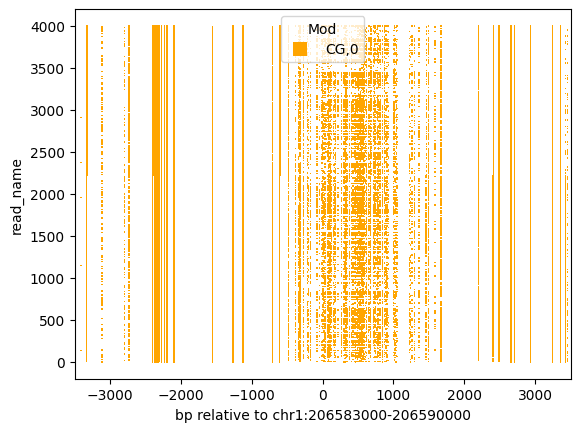

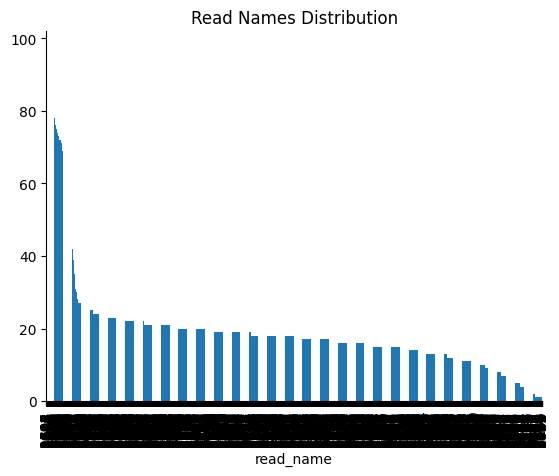

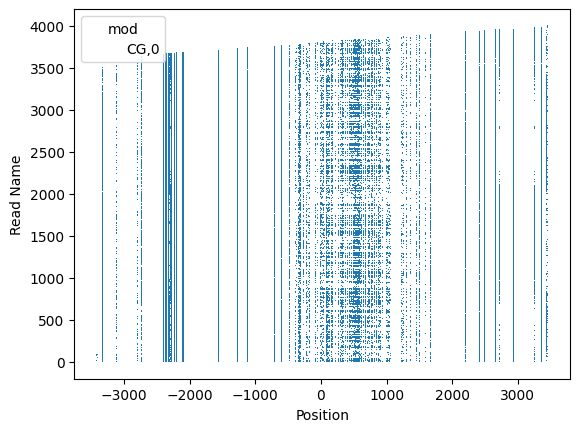

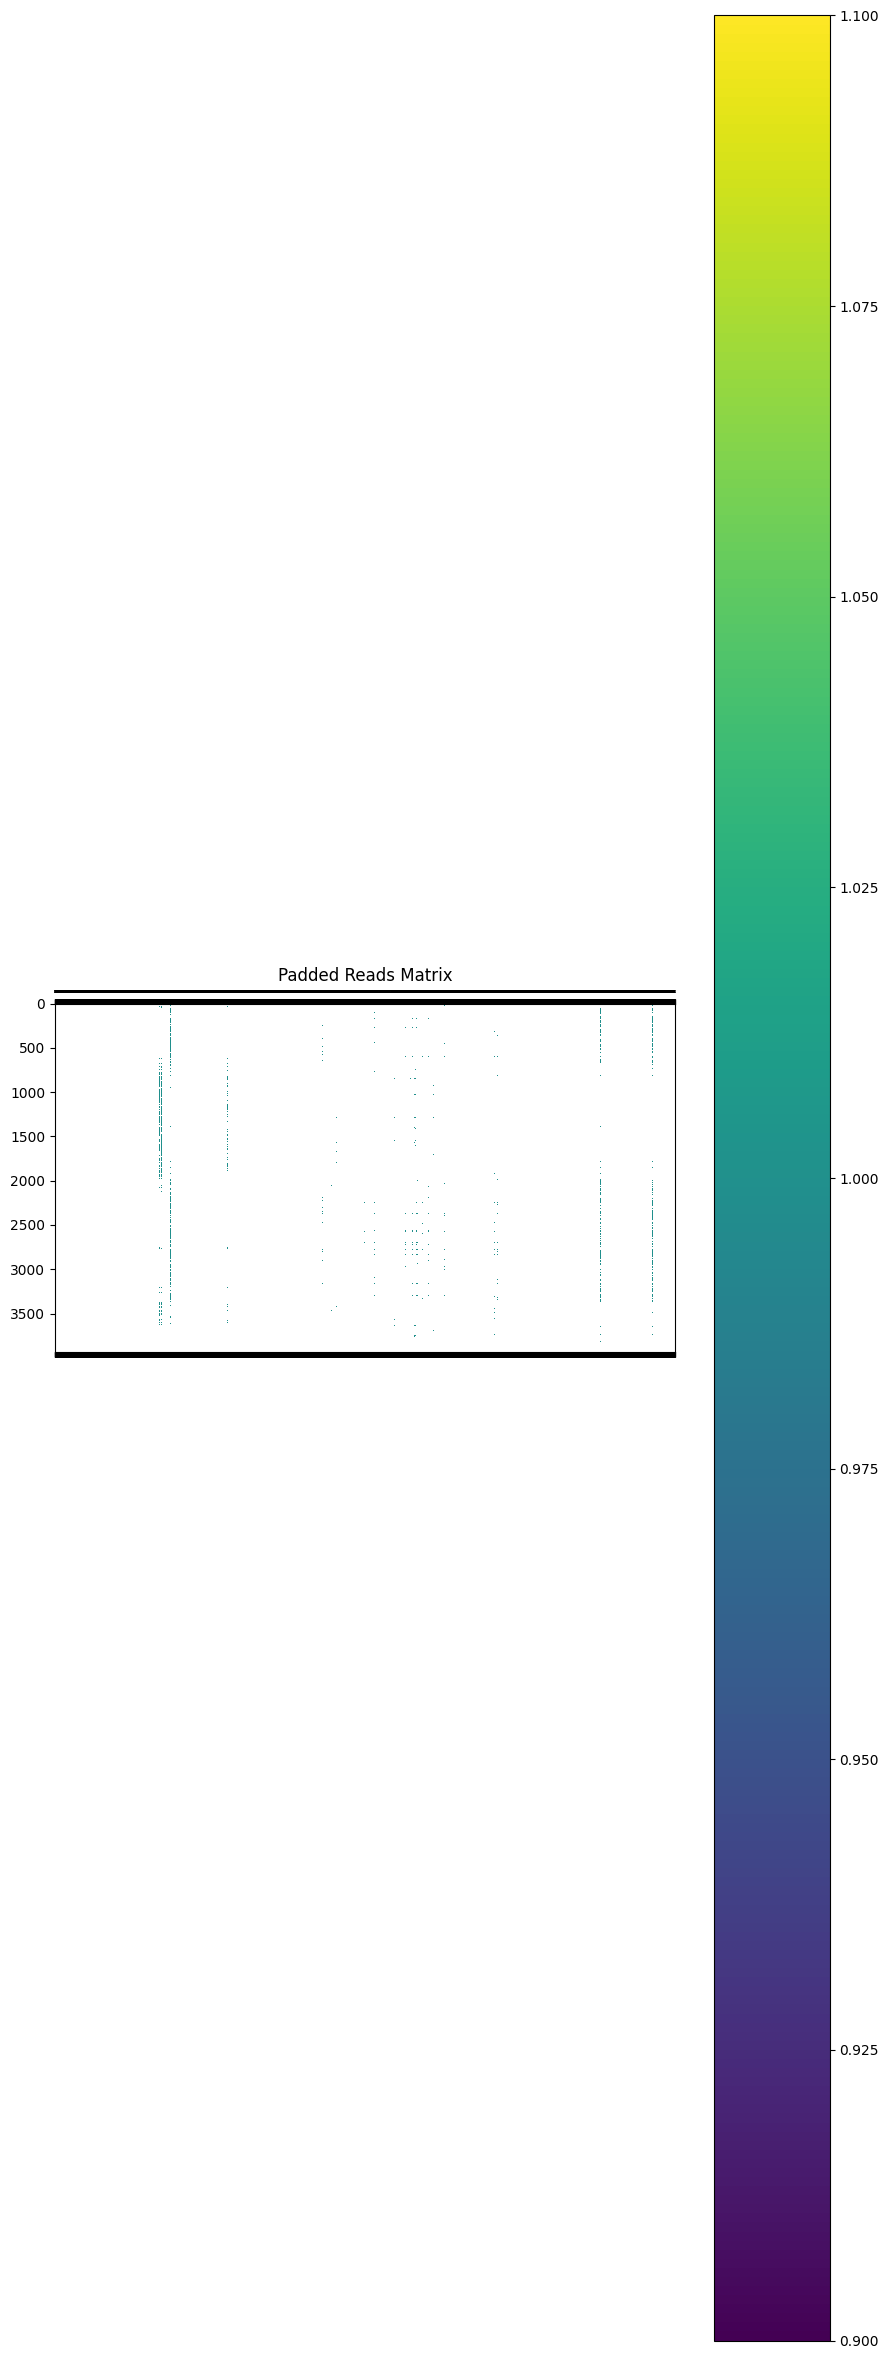

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy


In [21]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.9 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Padded reads loaded successfully.


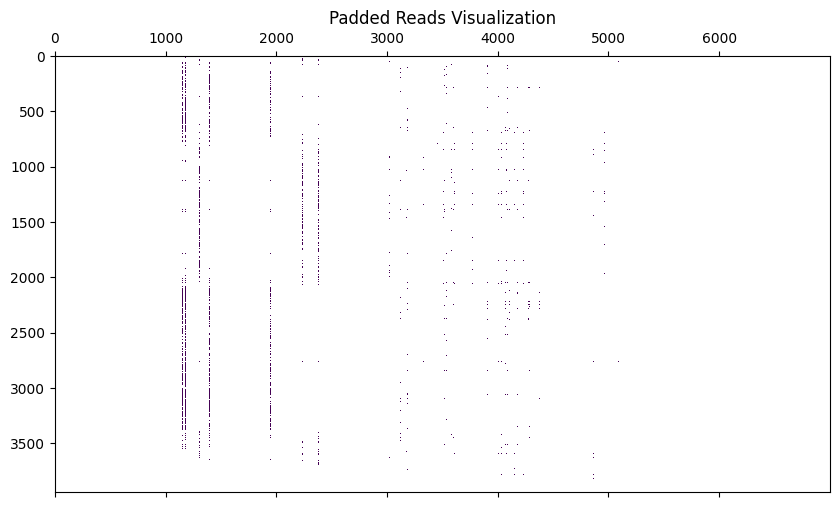

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

         G    C    C    A    T    T    G    C    C    T  ...    C    A    A  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

         A    A    C    T    A    A    C  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN

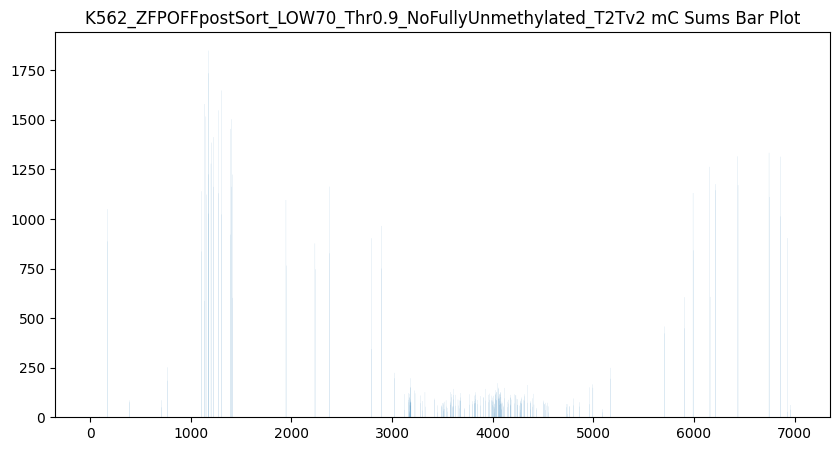

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


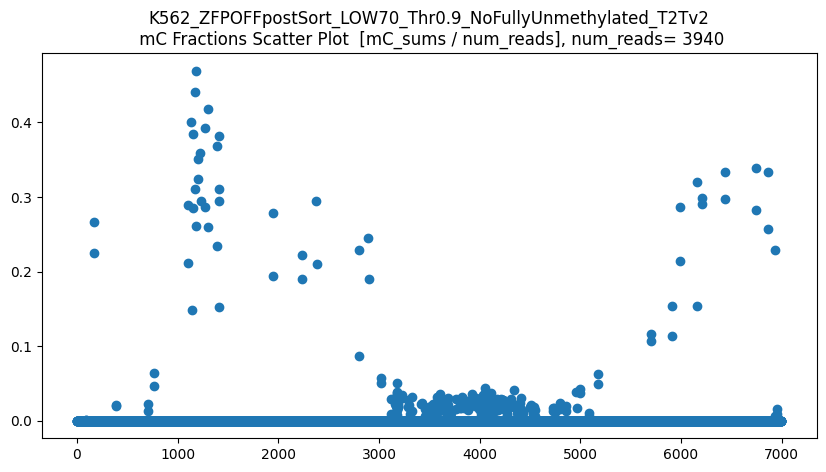

CGs_all_sums  = [   5. 1937.  161.  136.  436. 1976. 2167. 2640. 2960. 2876. 2664. 2575.
 2678. 2671. 2375. 2665. 1826. 1861. 1624. 1990. 1247. 1715.  421.  154.
  210.   95.  143.  132.  158.  212.  269.  228.  165.  153.  256.  181.
  116.  180.  181.   84.  116.  123.  113.   96.  120.  140.   75.  189.
  149.  218.  106.  233.  167.  171.  148.  130.  185.  204.   86.  179.
  147.  140.  191.  217.  186.  153.  166.  200.  227.  189.  207.  194.
  165.  160.  187.   78.  112.  117.  212.  250.  211.  215.  267.  249.
  242.  178.  191.  199.  192.  197.  217.  108.  109.  150.  109.  244.
  129.  157.  177.  158.  188.  186.  223.  156.  153.   84.  116.  156.
  168.  164.  171.  222.  236.  120.  145.  149.  182.   86.  159.  132.
  109.  132.   79.  118.   83.  110.  155.  130.  217.  315.   66.  443.
  881. 1055. 1973. 1870. 2321. 2487. 2445. 2327.  931.  100.]
CGs_all_sums / len(CGs_all) = [0.00126904 0.49162437 0.04086294 0.03451777 0.1106599  0.50152284
 0.55       0.67005076

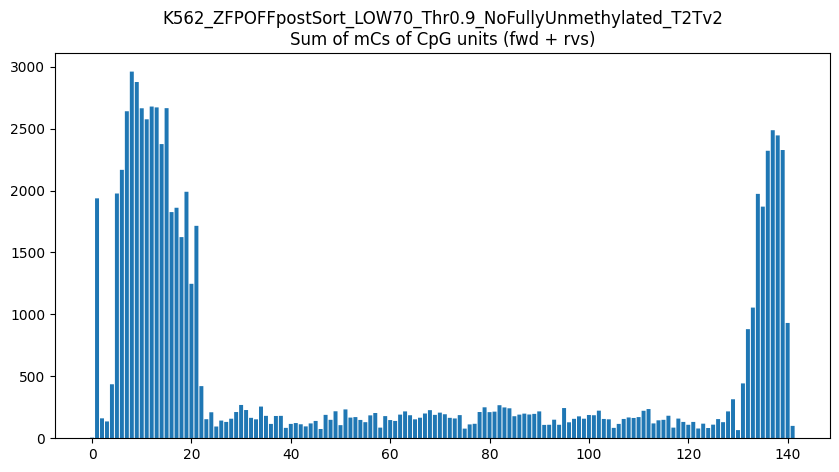

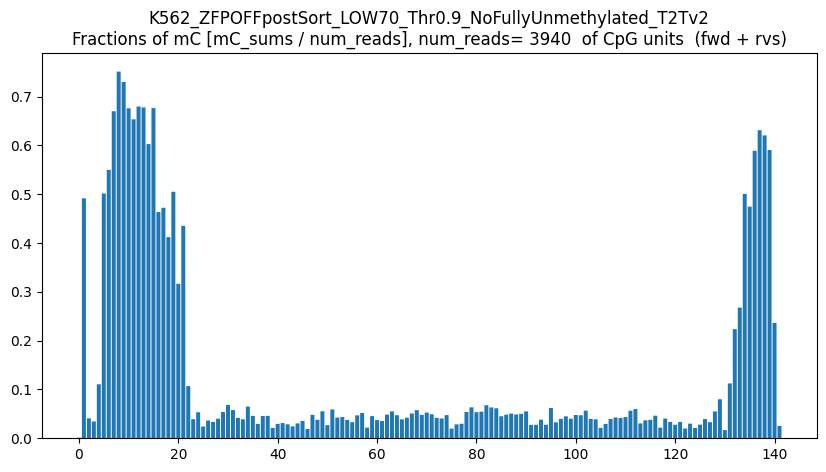

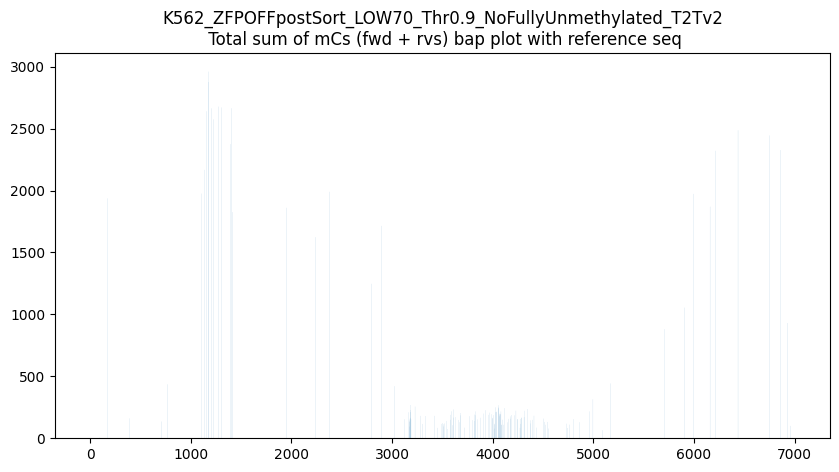

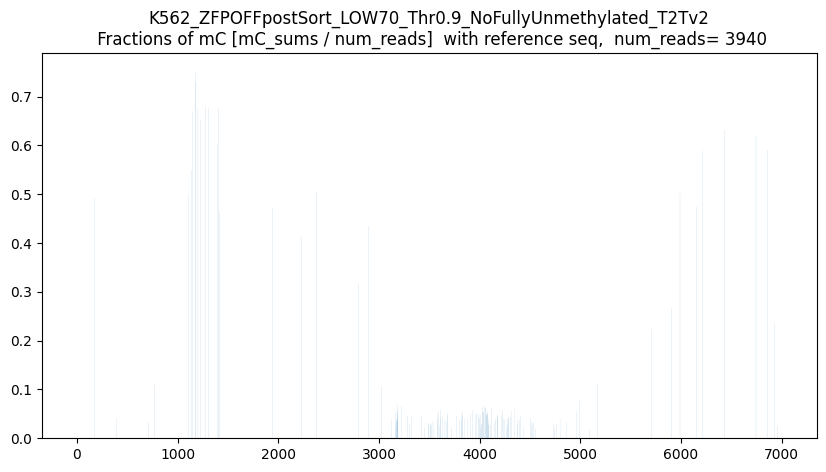

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



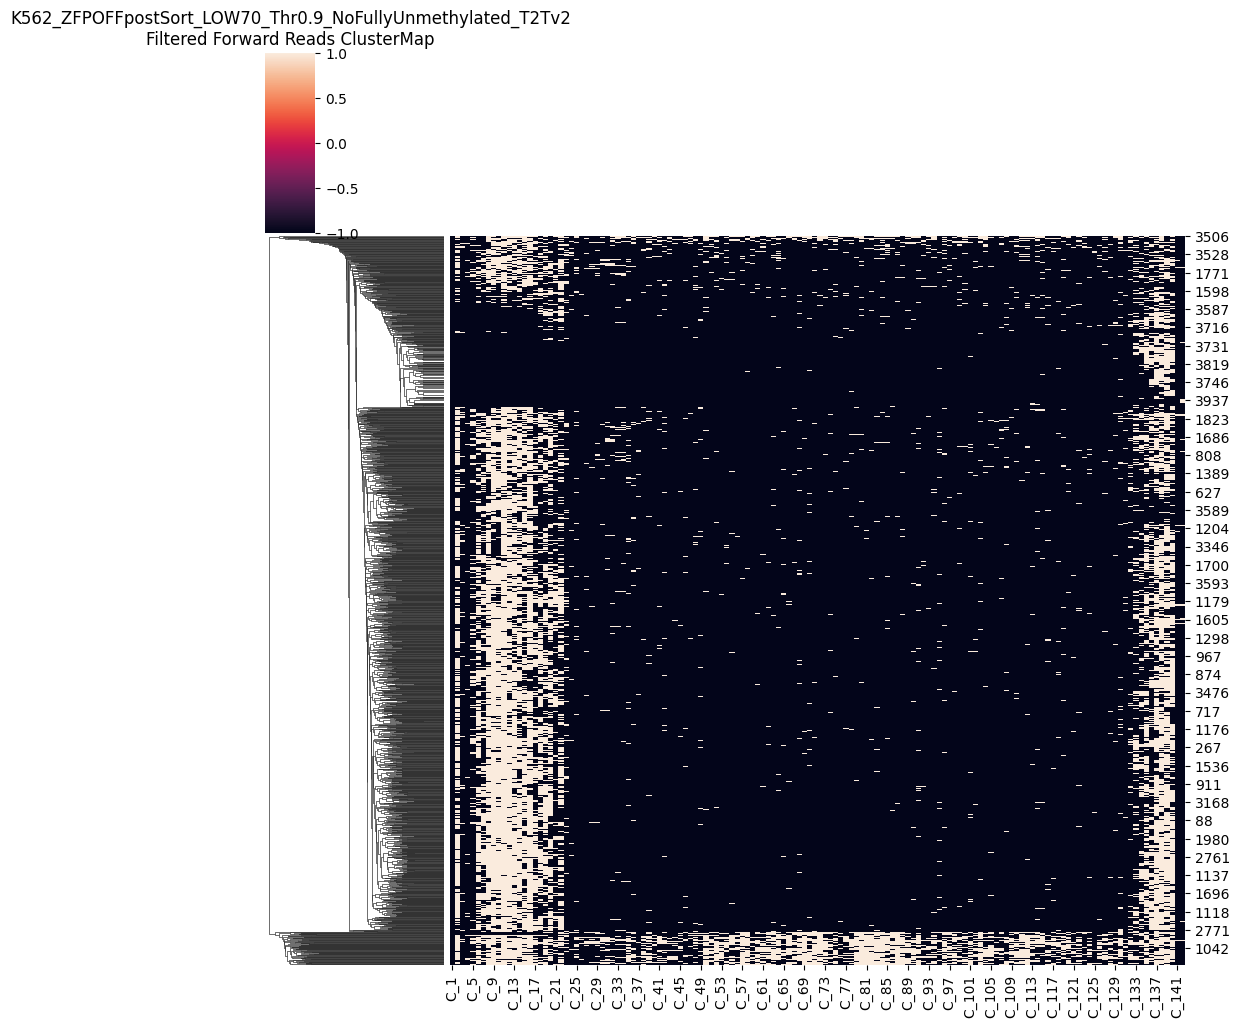

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



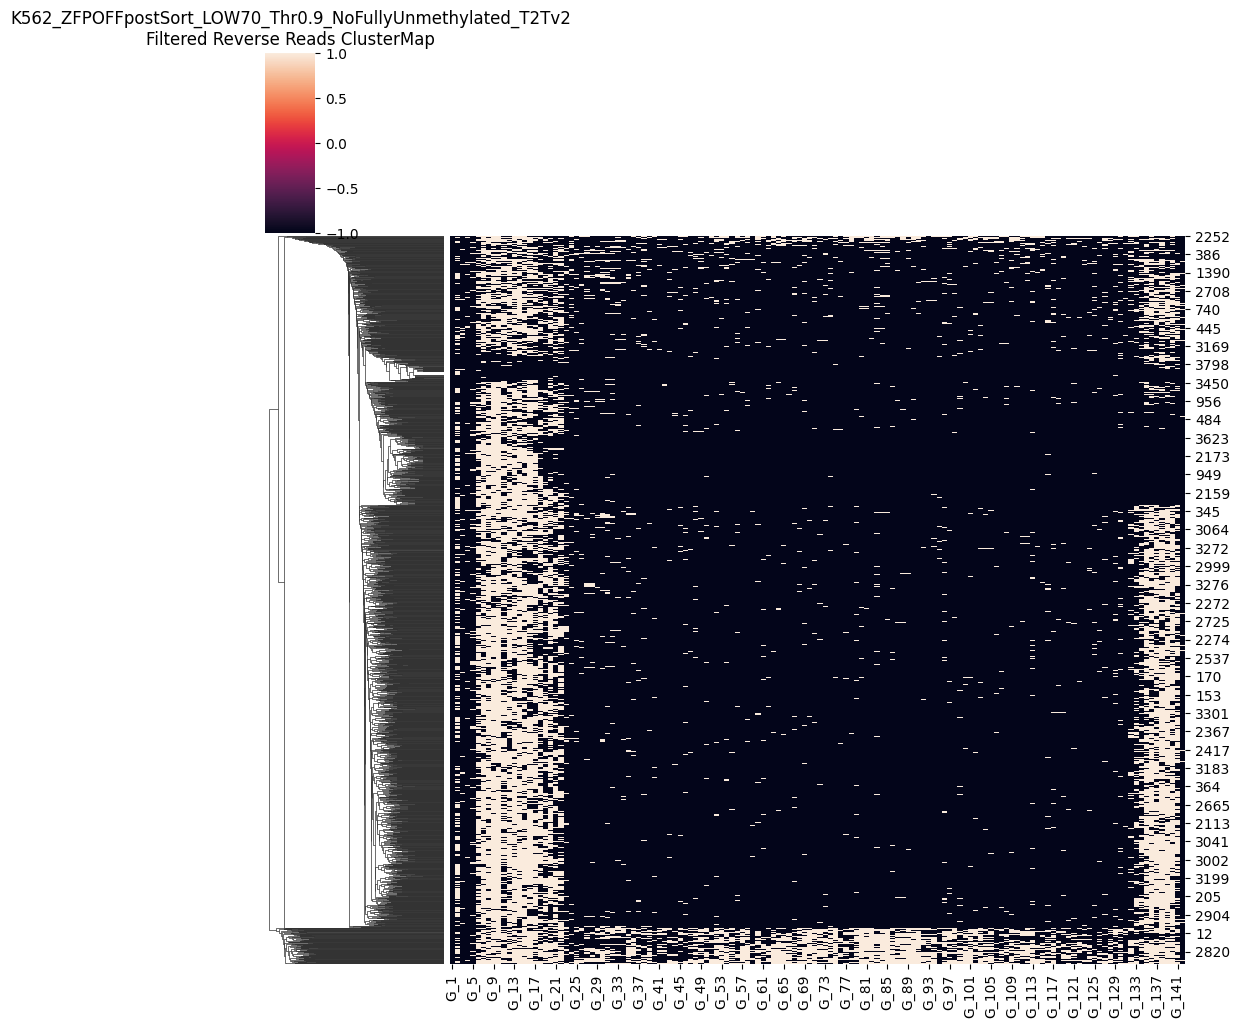

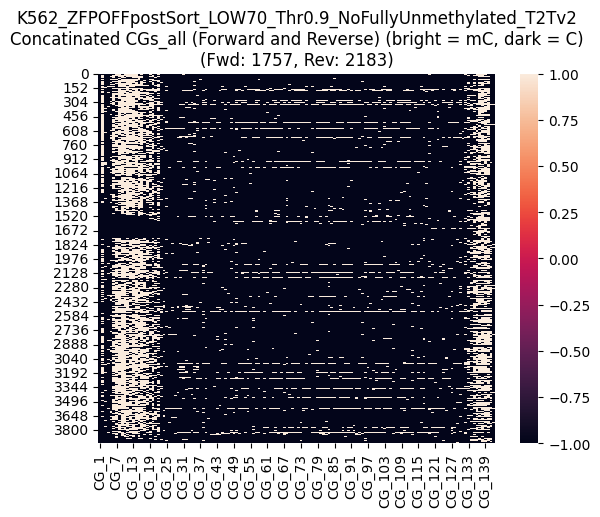

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



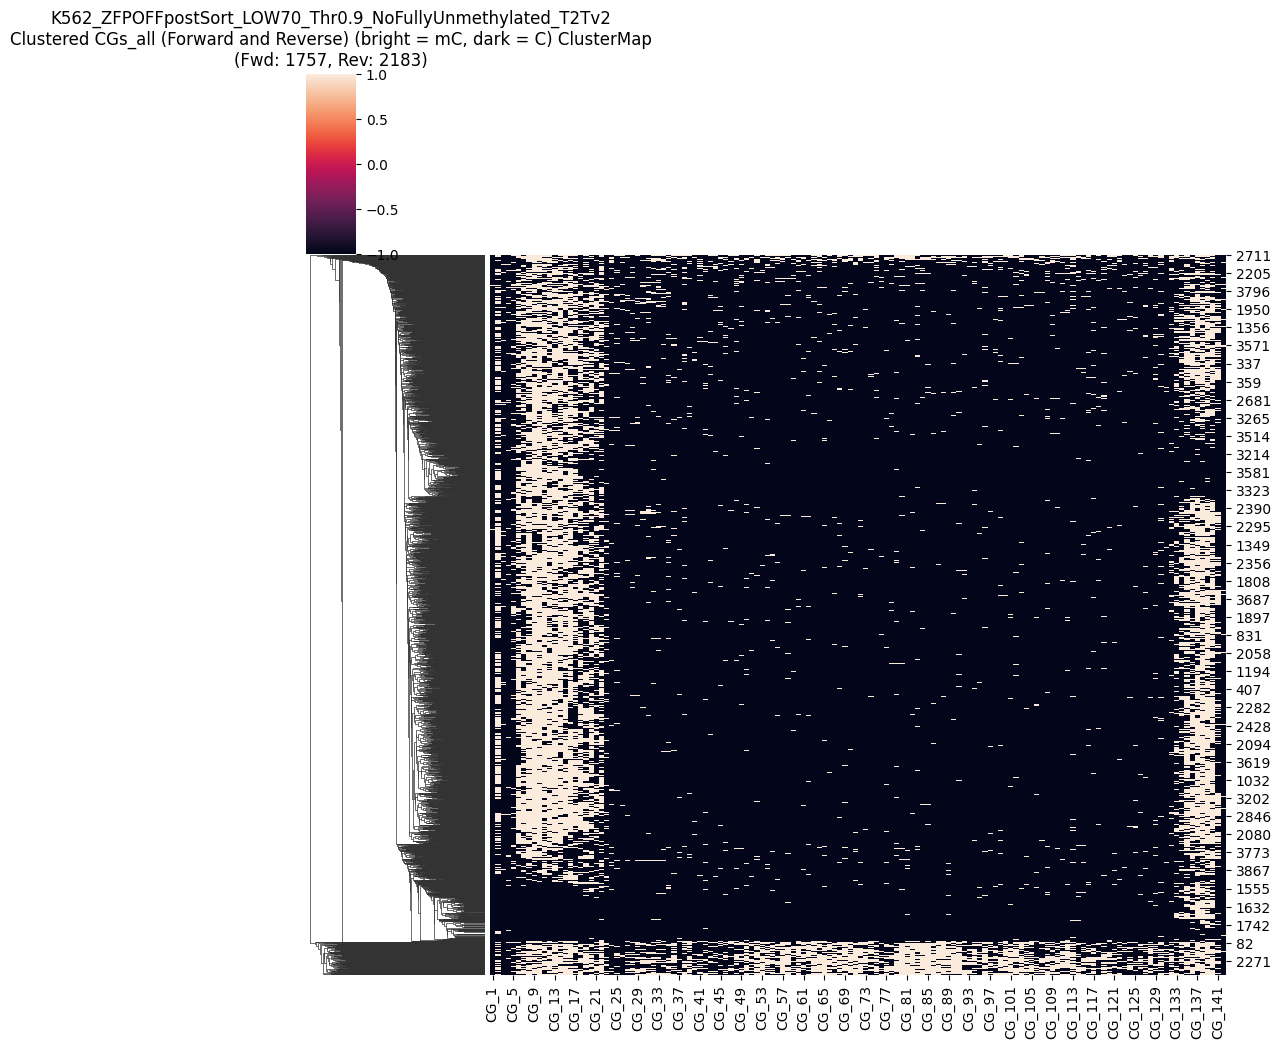

CGs_all saved as CG_142_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1757_numRVS2183_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy in dimelo_v2_output
CGs_all saved as CG_info_df_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1757_numRVS2183_2025-03-25.csv in dimelo_v2_output
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): too many values to unpack (expected 4)


In [22]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around ~3000 reads located near the ROI, 

only ~1300 reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads: 788

Reverse reads: 516 

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2942 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2942   0% | 00:00<…

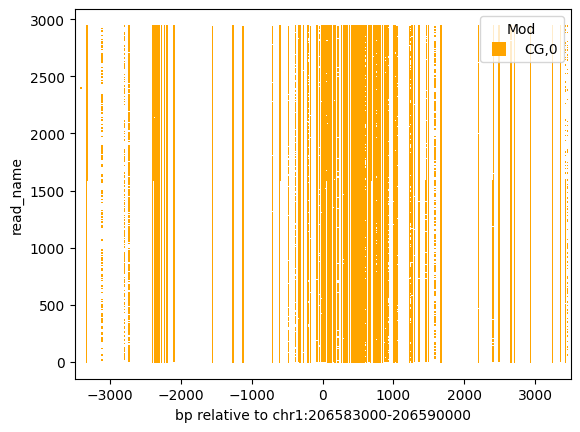

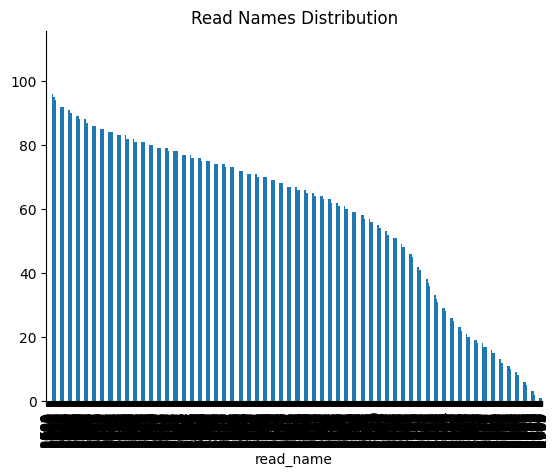

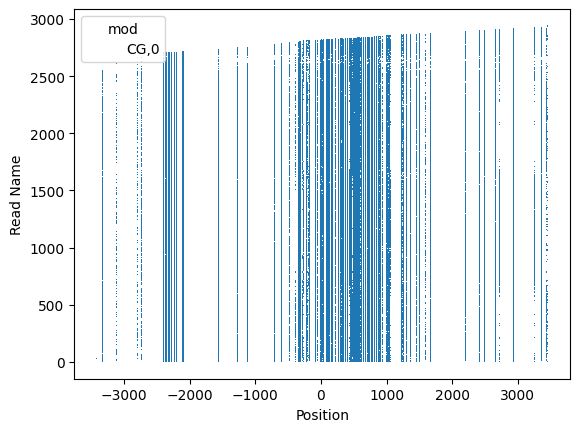

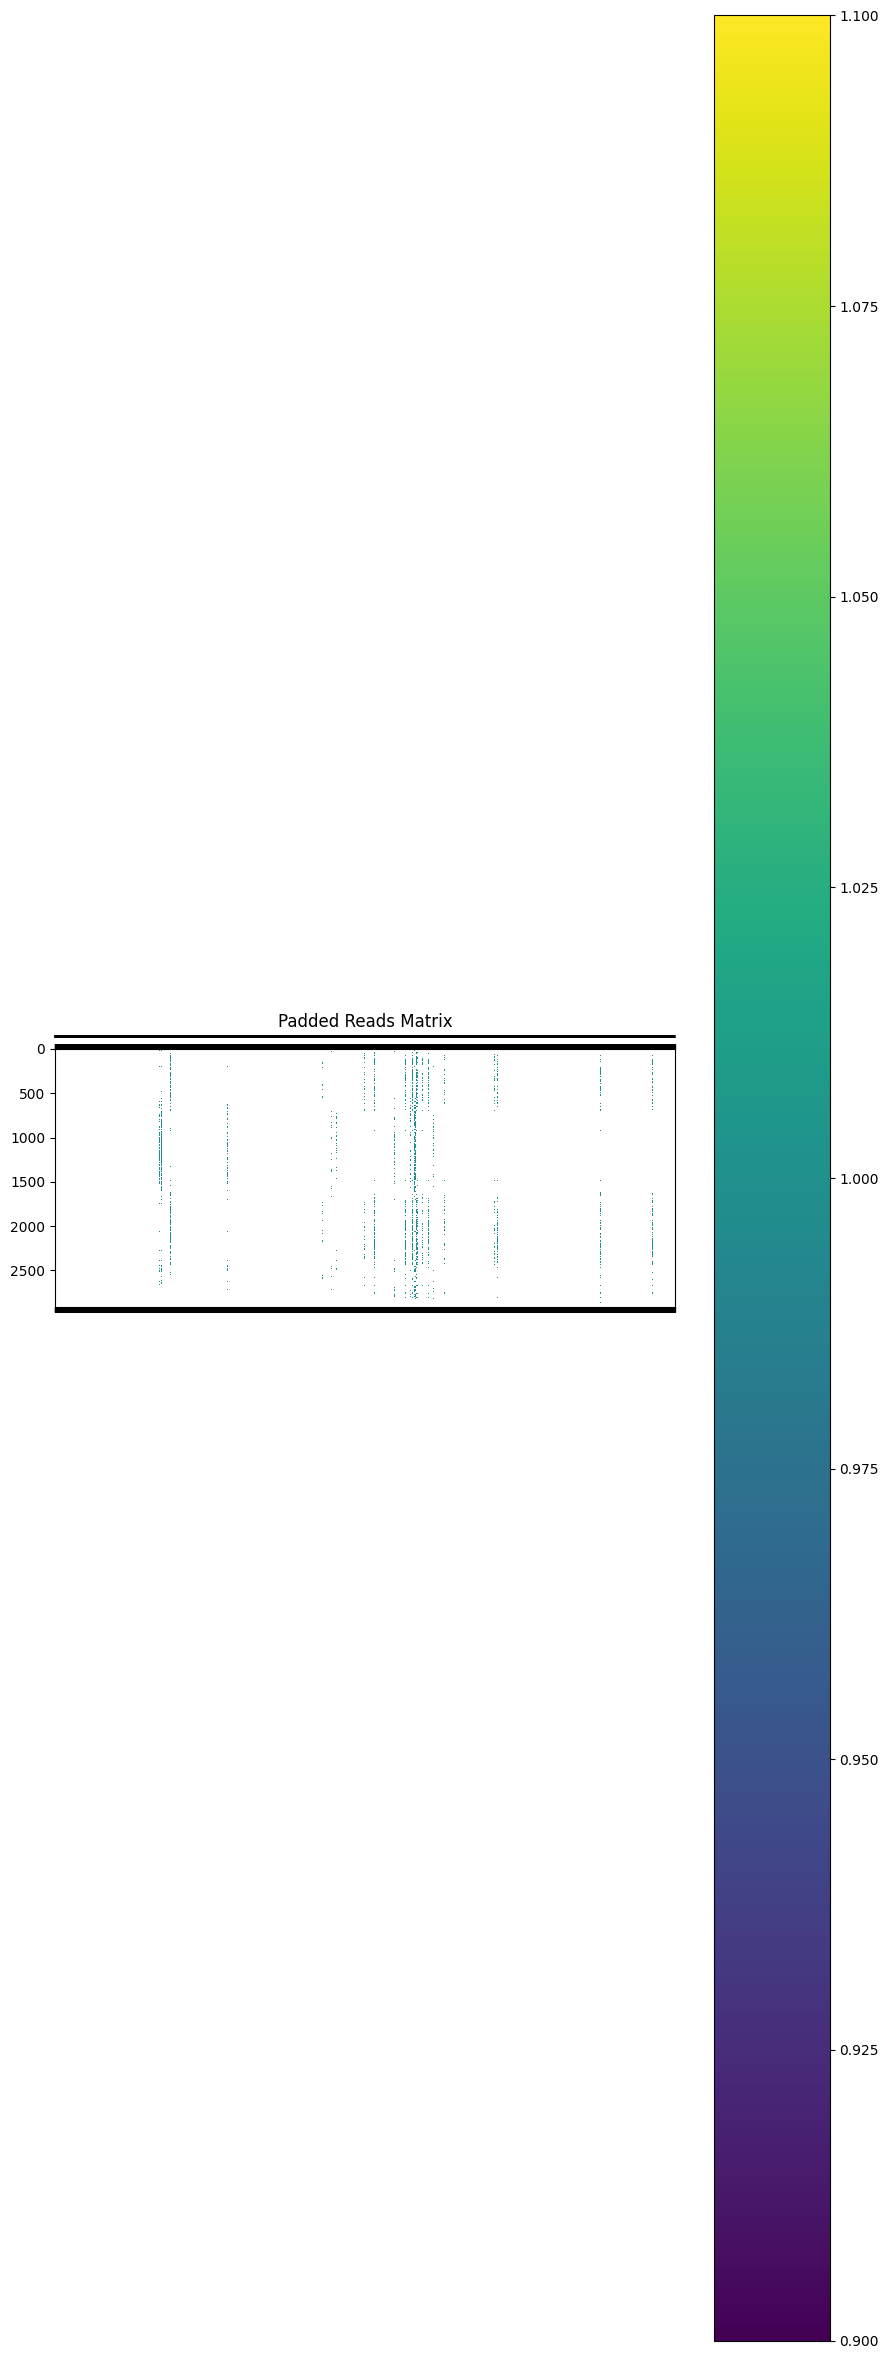

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy


In [23]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [24]:
save_padded_reads_name_np

'padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy'

Padded reads loaded successfully.


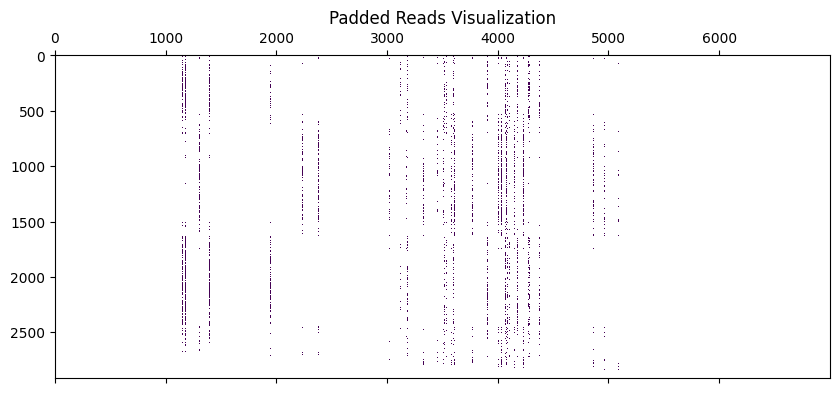

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

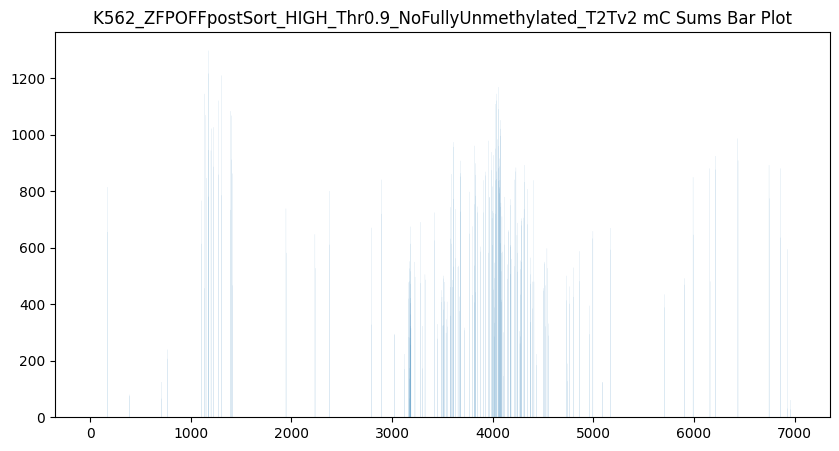

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


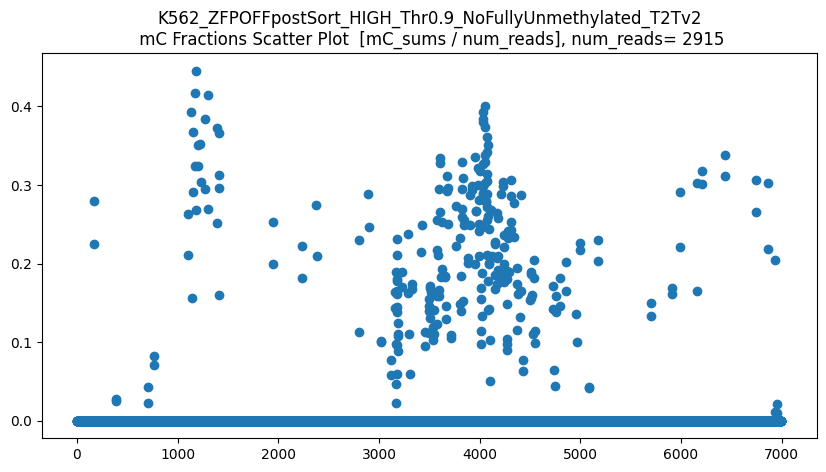

CGs_all_sums  = [1.000e+00 1.471e+03 1.550e+02 1.910e+02 4.470e+02 1.381e+03 1.602e+03
 1.917e+03 2.163e+03 2.079e+03 1.966e+03 1.914e+03 1.980e+03 1.996e+03
 1.818e+03 1.980e+03 1.330e+03 1.321e+03 1.176e+03 1.412e+03 9.990e+02
 1.561e+03 5.860e+02 3.950e+02 8.980e+02 3.510e+02 6.890e+02 6.550e+02
 8.080e+02 1.018e+03 1.147e+03 9.390e+02 6.870e+02 5.720e+02 1.047e+03
 1.166e+03 4.960e+02 9.930e+02 1.351e+03 6.080e+02 8.580e+02 7.500e+02
 8.720e+02 8.270e+02 8.890e+02 6.460e+02 7.300e+02 1.205e+03 9.910e+02
 1.475e+03 9.470e+02 1.747e+03 1.490e+03 1.300e+03 1.068e+03 8.030e+02
 1.760e+03 1.592e+03 6.250e+02 1.448e+03 1.109e+03 9.440e+02 1.715e+03
 1.642e+03 1.342e+03 1.471e+03 1.190e+03 1.564e+03 1.725e+03 1.561e+03
 1.558e+03 1.814e+03 1.522e+03 1.340e+03 1.651e+03 7.380e+02 8.270e+02
 9.360e+02 1.559e+03 2.060e+03 1.991e+03 1.988e+03 1.866e+03 2.051e+03
 2.006e+03 1.625e+03 1.681e+03 1.756e+03 1.668e+03 1.741e+03 1.780e+03
 9.260e+02 9.980e+02 1.297e+03 4.470e+02 1.391e+03 1.031e+03 

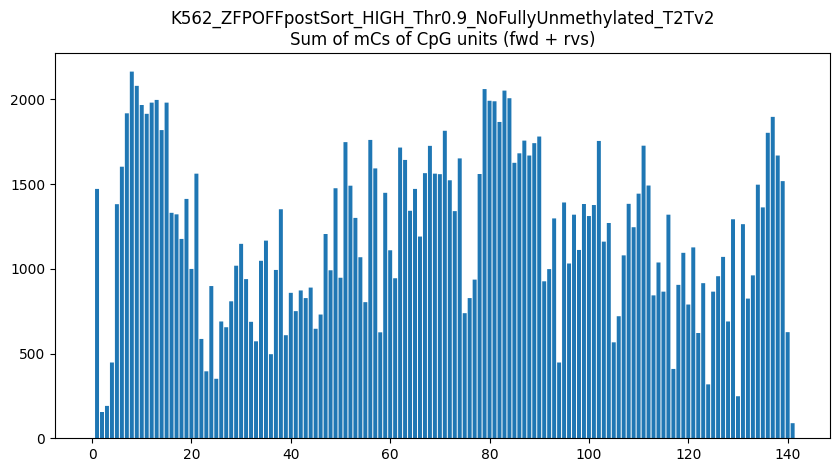

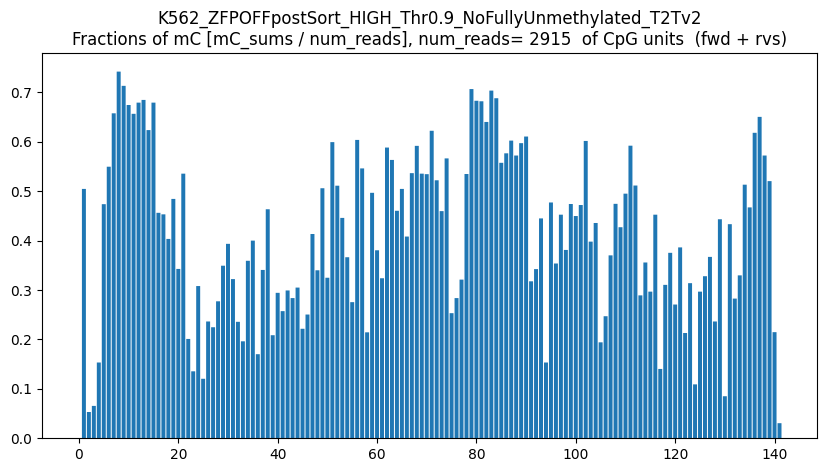

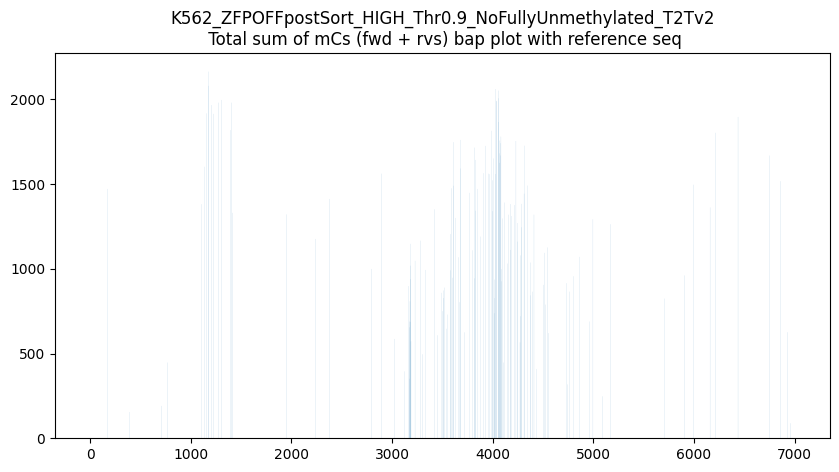

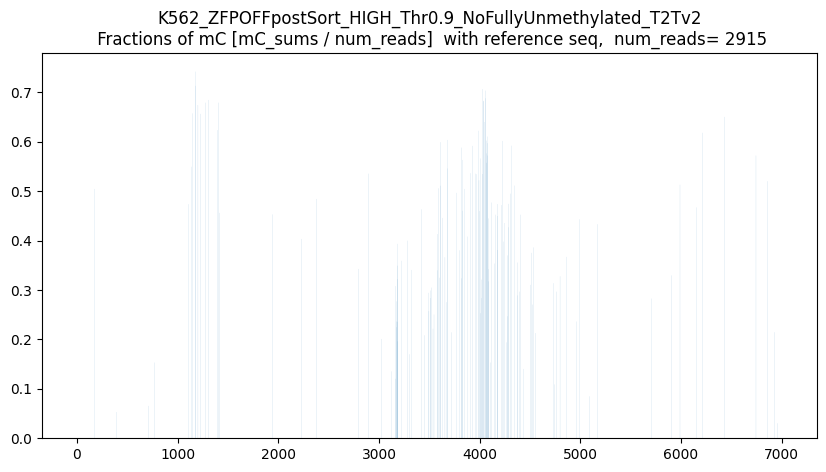

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



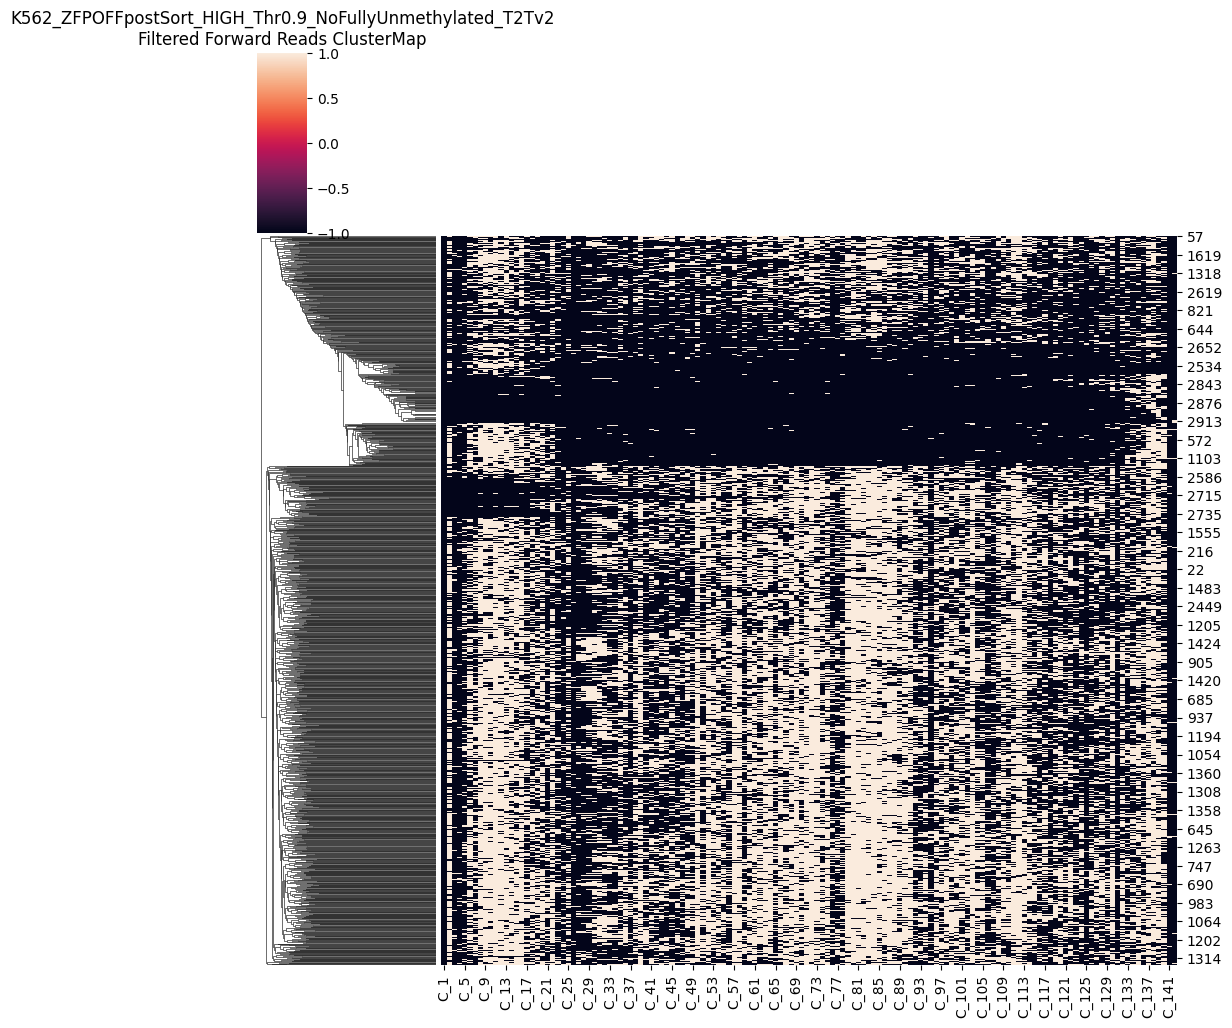

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



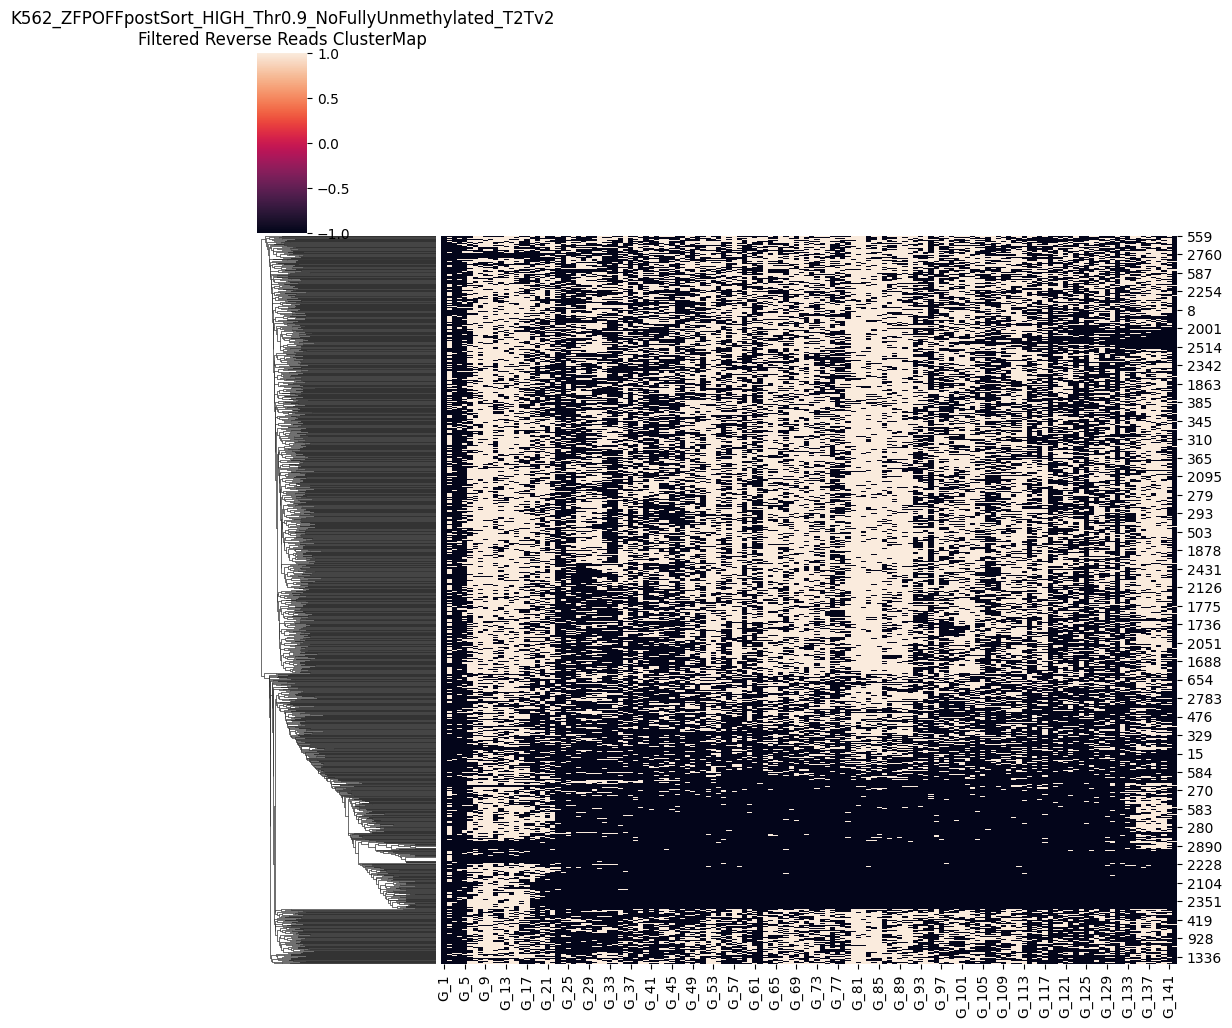

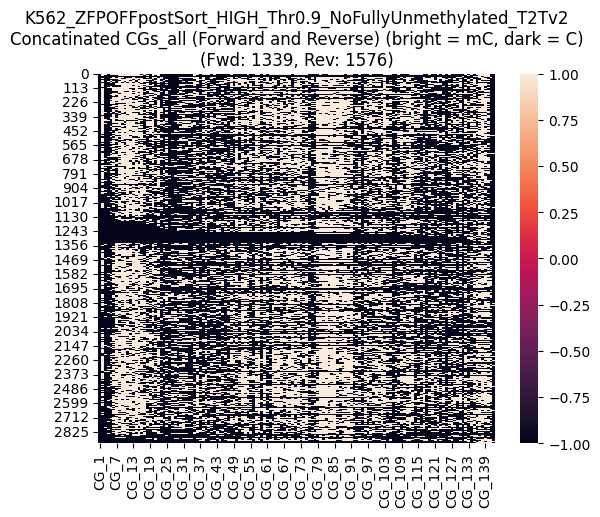

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



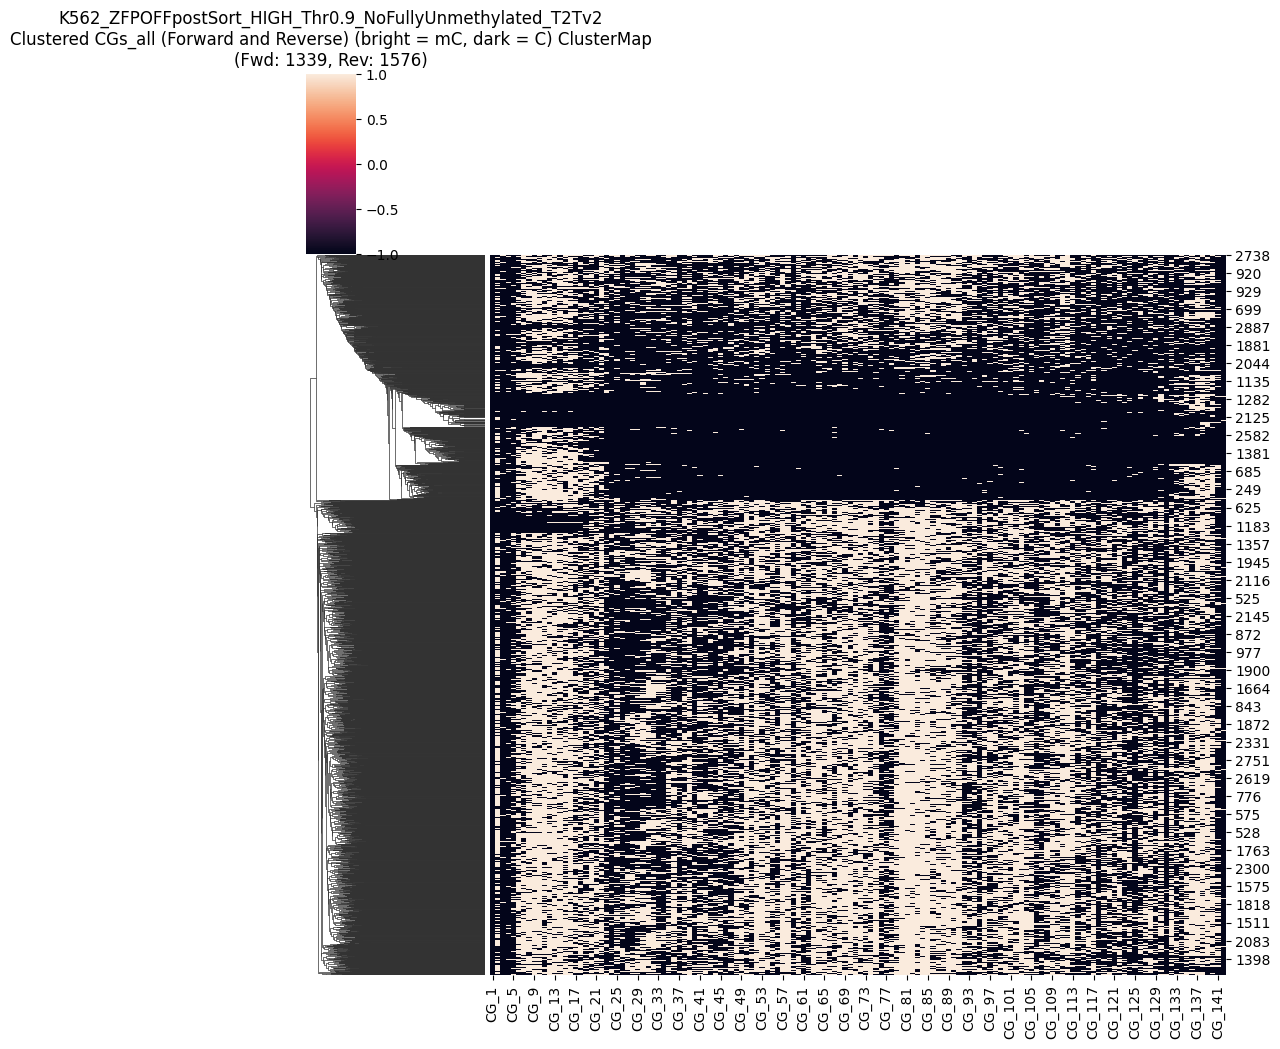

CGs_all saved as CG_142_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1339_numRVS1576_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-03-25.npy in dimelo_v2_output
CGs_all saved as CG_info_df_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1339_numRVS1576_2025-03-25.csv in dimelo_v2_output
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): too many values to unpack (expected 4)


In [25]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [26]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silence  cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads:  

Reverse reads:  

~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds [0.7 and 0.9 - done]
- try extanding to londer regions than my 30 bps [Done!]
